In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML

# BrainSpan ExonExp

## 1. Load Data

### 1.1 Load RPKM sum to Exon

In [2]:
ins = BrainSpan()
# Columns Meta Data
bp_exon_col_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/columns_metadata.csv", delimiter=",")
bp_exon_col_meta.age.unique()
bp_exon_col_meta["Period"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
bp_exon_col_meta["Stage"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
bp_exon_col_meta["Description"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
#print bp_exon_col_meta.shape
display(bp_exon_col_meta.head(2)) 
#print "Sample size", pd.unique(bp_exon_col_meta.donor_id).size
#print "Periods:",bp_exon_col_meta.drop_duplicates("donor_id").groupby("Period")["Period"].count()
strcture_count = bp_exon_col_meta.groupby("structure_acronym")["structure_acronym"].count()
Regions = bp_exon_col_meta.drop_duplicates("structure_acronym")[["structure_id","structure_acronym","structure_name"]]
Regions["sample count"] = Regions.apply(lambda row: strcture_count[row["structure_acronym"]], axis=1)
Regions.to_excel("../data/expression/brainspan/exons_matrix/Regions.xlsx", index=False)
# Rows Meta Data
bp_exon_row_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/rows_metadata.csv", delimiter=",")
bp_exon_row_meta["exon length"] = bp_exon_row_meta["end"] - bp_exon_row_meta["start"]
display(bp_exon_row_meta.head(2))

column_num  donor_id   donor_name    age gender  structure_id  \
0           1     13058  H376.IIA.51  8 pcw      M         10665   
1           2     13058  H376.IIA.51  8 pcw      M         10194   

  structure_acronym               structure_name Period Stage     Description  
0               URL  upper (rostral) rhombic lip     2A     2  Early prenatal  
1               OFC       orbital frontal cortex     2A     2  Early prenatal

row_num  gene_id  ensembl_gene_id gene_symbol  entrez_id     start  \
0        1  1086864  ENSG00000000003      TSPAN6     7105.0  99883666   
1        2  1086864  ENSG00000000003      TSPAN6     7105.0  99885755   

        end  exon length  
0  99884983         1317  
1  99885863          108

In [3]:
# Exon RPKM Matrix
ExonExp = pd.read_csv("../data/expression/brainspan/exons_matrix/expression_matrix.csv", header=None)
display(ExonExp.head(2))

0          1          2          3          4          5          6    \
0    1  13.636583  40.862901  32.178981  27.939465  29.324584  23.885710   
1    2  31.731240  86.587706  60.131360  57.718046  58.326412  54.090394   

         7          8          9      ...          515       516       517  \
0  24.887880  16.432391  45.570680    ...     4.347437  4.101772  2.987192   
1  50.138146  35.408905  94.937737    ...     6.332389  5.479924  5.946744   

        518       519       520       521       522       523       524  
0  3.862508  3.362597  2.566516  3.049593  5.025746  1.893471  8.942586  
1  6.017439  5.585987  3.870925  4.083335  7.451925  2.946266  3.868906  

[2 rows x 525 columns]

In [4]:
# Exon RPKM Norm by Gene RPKM
NormExonExp = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/NormedExonExpMatrix.csv", header = None)
NormExonExp.head(2)

0        1         2         3         4         5         6         7    \
0    1  0.92888  0.994602  1.163014  1.058665  0.973158  1.077006  1.026251   
1    2  2.16143  2.107543  2.173270  2.187017  1.935605  2.438935  2.067446   

        8         9      ...          515       516       517       518  \
0  0.991086  1.055019    ...     1.260625  1.330526  1.289509  1.307571   
1  2.135616  2.197930    ...     1.836202  1.777569  2.567087  2.037077   

        519       520       521       522       523       524  
0  1.108135  1.232750  1.339092  1.442238  1.217121  1.856548  
1  1.840848  1.859284  1.793013  2.138479  1.893857  0.803214  

[2 rows x 525 columns]

### 1.2 Load RPKM sum to Gene

In [5]:
GeneExp = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/expression_matrix.csv", header=None)
GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/rows_metadata.csv")
GeneCol = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/columns_metadata.csv")
GeneCol["Period"] = GeneCol.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
GeneCol["Stage"] = GeneCol.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
GeneCol["Description"] = GeneCol.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
GeneDat = [GeneExp, GeneRow, GeneCol]

In [6]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
Regions = ["OFC", "VFC", "ITC", "DFC", "STC", "MFC"]

In [49]:
print bp_exon_row_meta_with_gene.groupby('gene_symbol').count().shape

(94, 14)


# Anlysis

## 1.Mutation targeted Exons

In [9]:
VarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014LGD.xlsx"
bp_exon_row_meta_wiglerLGD = ins.AssignVar2Exon2(bp_exon_row_meta, VarFile)

309222

In [14]:
bp_exon_row_meta_with_gene = bp_exon_row_meta_wiglerLGD[bp_exon_row_meta_wiglerLGD["GeneHited"]=="T"]
bp_exon_row_meta_with_gene.to_excel("GenesExonsTargetedByLGD_wilger2014_predicted.xlsx", index=False)
bp_exon_row_meta_with_var = bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["Vars"]!=""]
bp_exon_row_meta_without_var = bp_exon_row_meta_with_gene[bp_exon_row_meta_with_gene["Vars"]==""]
print bp_exon_row_meta_with_gene.shape, bp_exon_row_meta_with_var.shape, bp_exon_row_meta_without_var.shape

(2269, 15) (107, 15) (2162, 15)


Targeted
Loading records:106
Untargeted
Loading records:2161


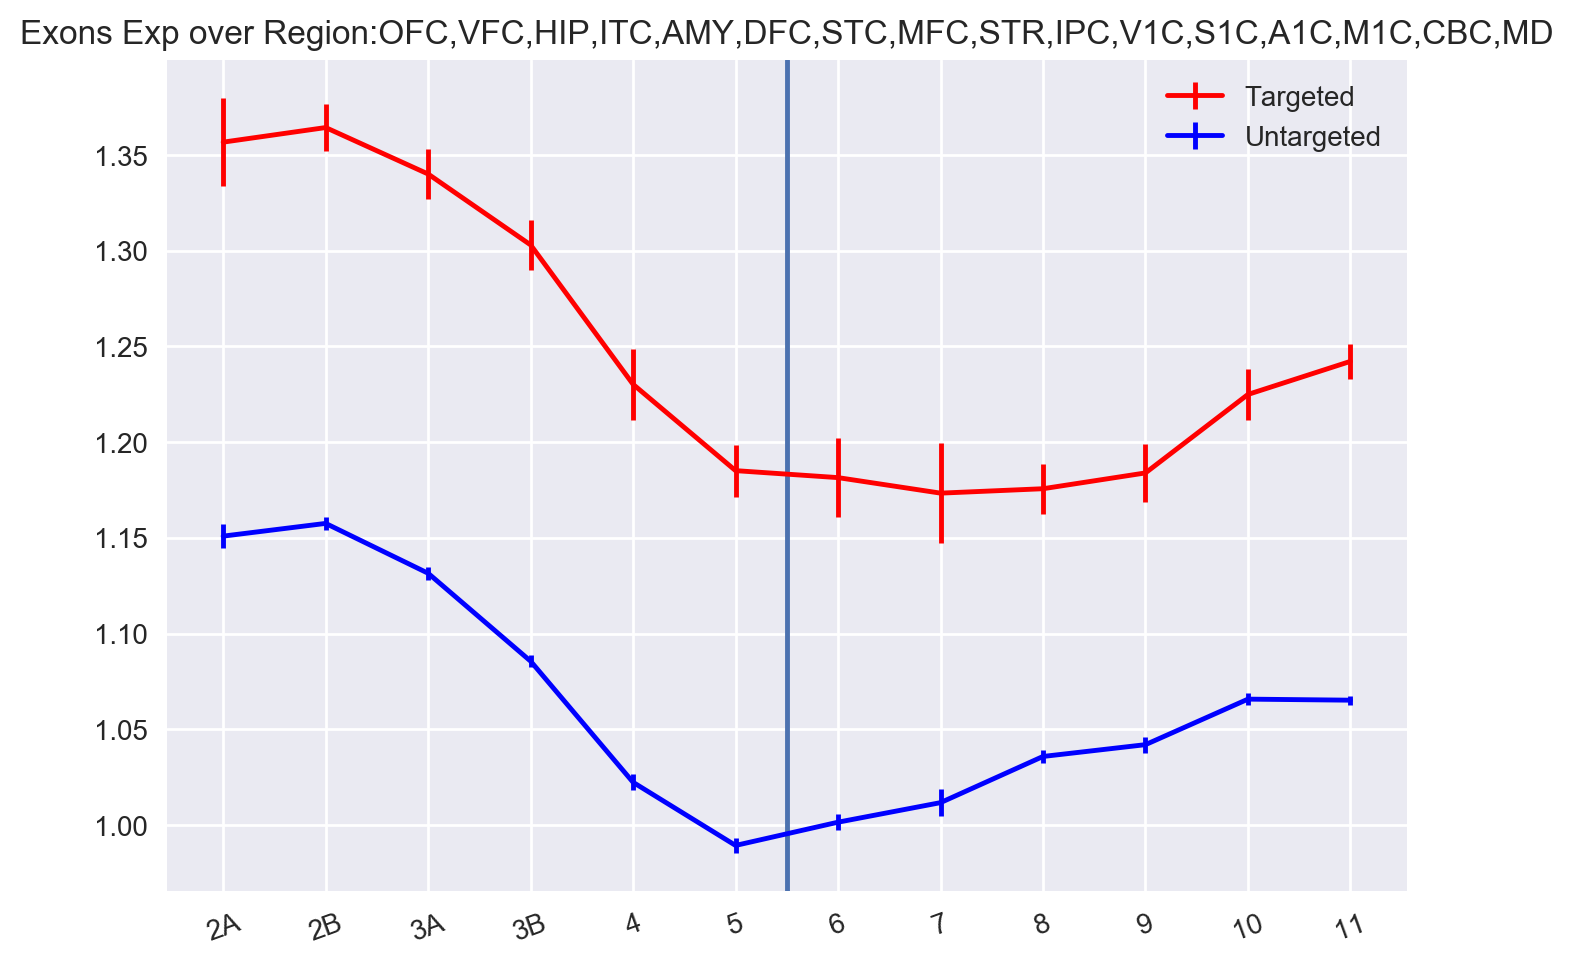

Targeted
Loading records:106
Untargeted
Loading records:2161


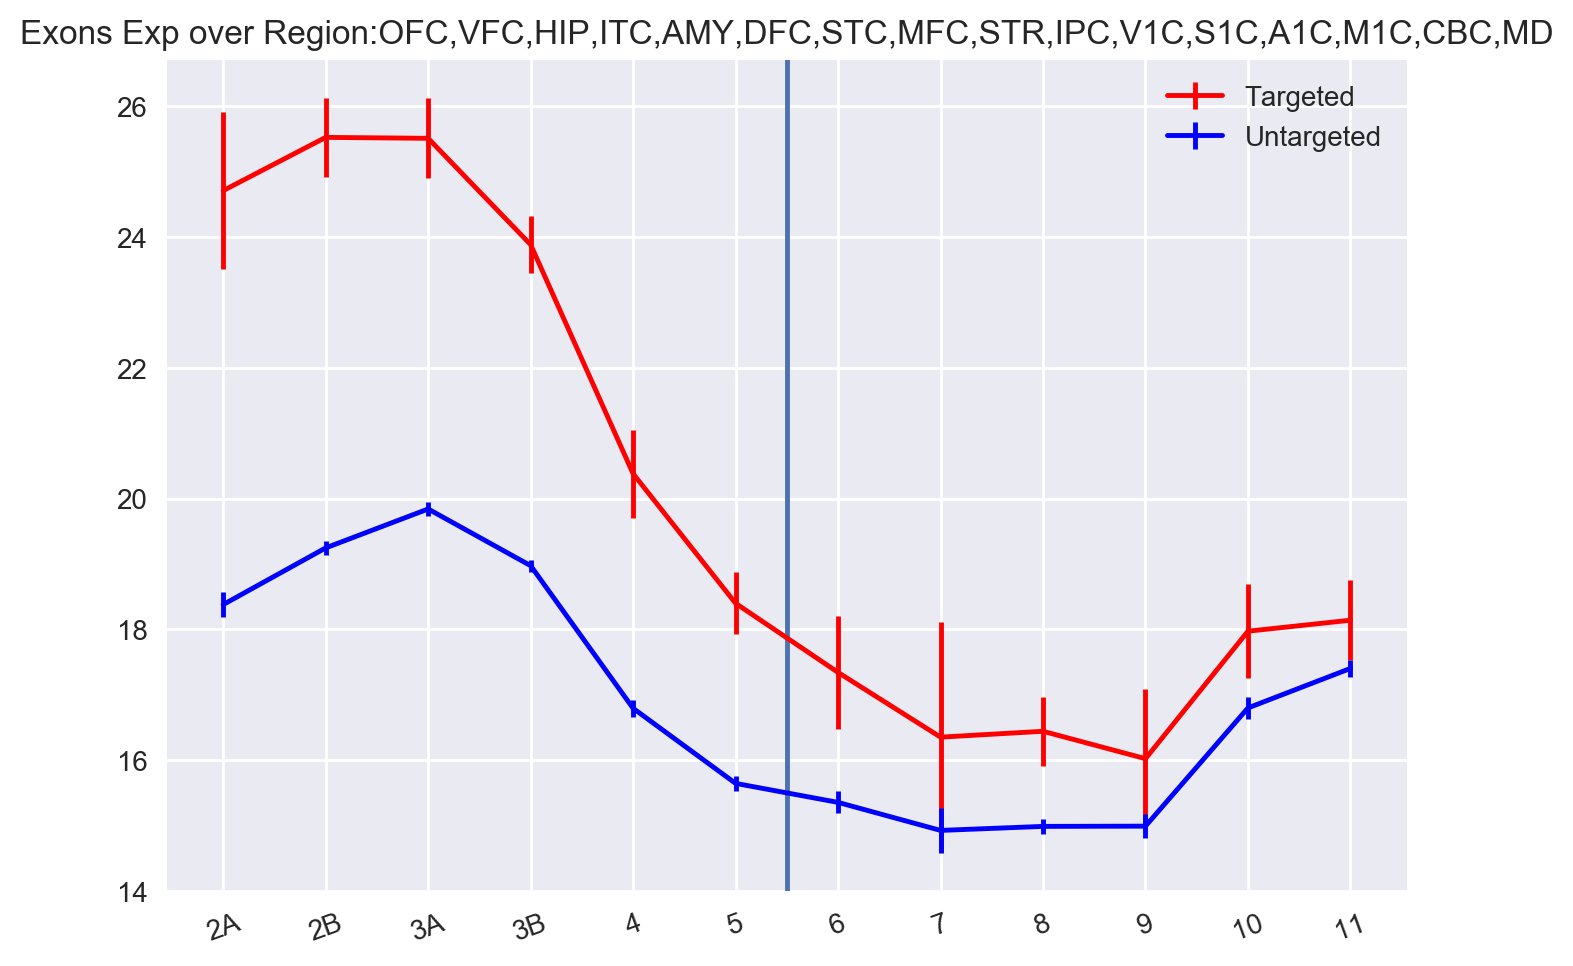

In [15]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

Targeted
Loading records:106
Untargeted
Loading records:2161


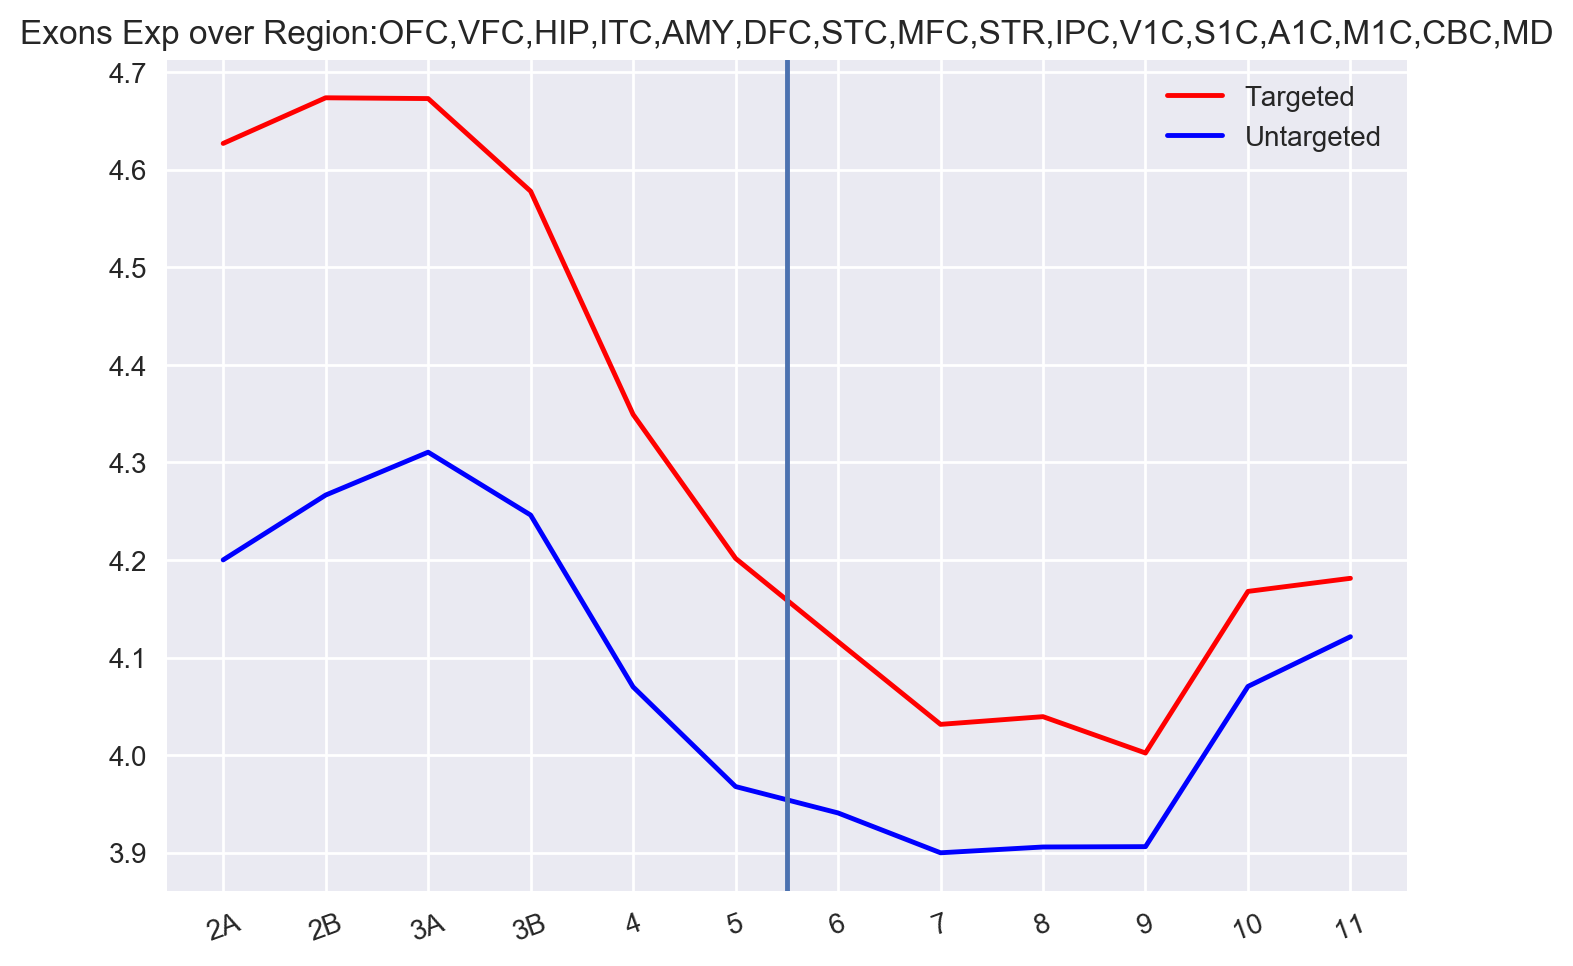

In [50]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

Targeted
Loading records:106
Untargeted
Loading records:2161


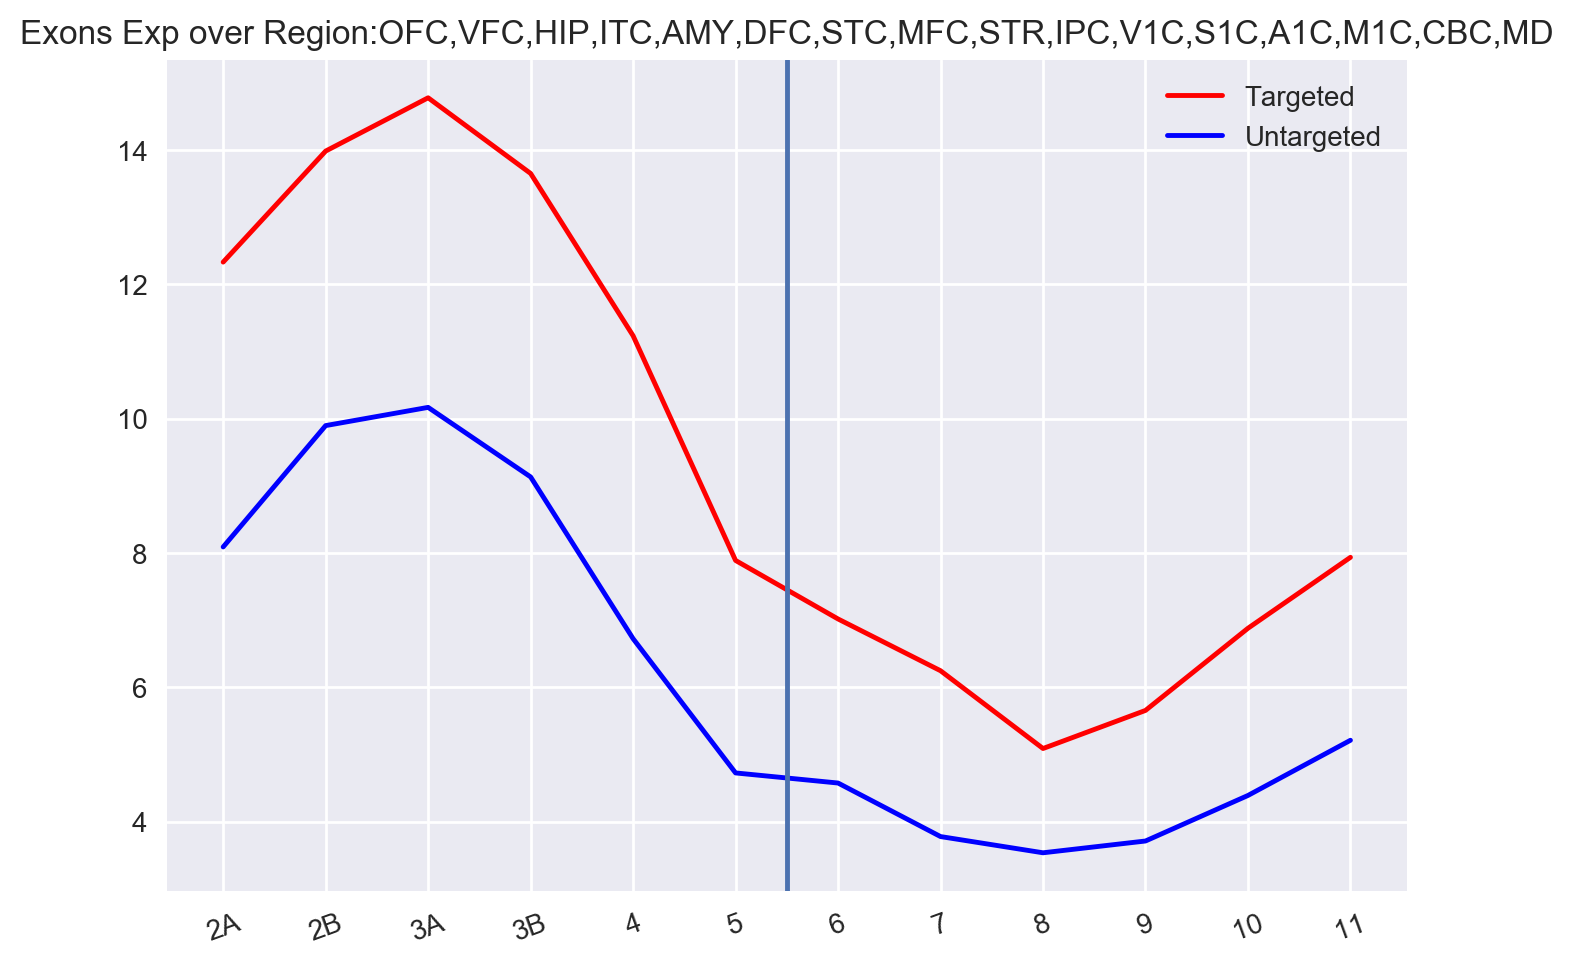

In [51]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

Targeted
Loading records:83173658
Loading records:97213516
Loading records:106[24.218604831074238, 25.033087393515494, 25.087851296366924, 23.479870326035826, 20.007977871285323, 18.021231024238805, 16.951501072971546, 15.912183833081922, 15.889035502704774, 15.493432086905024, 17.439575529915228, 17.685359314509551] [1.1078542784117462, 1.0894891890103451, 1.0588544130156161, 1.1146268348201236, 1.1798433183873855, 1.3175404701676785, 1.5491711459972235, 1.698435930977843, 1.7981986187204606, 1.7429633958037907, 1.7828058986021895, 1.7386430572843998] [21.860821682969675, 22.976902979876932, 23.693390694681767, 21.065229718630416, 16.958165172840324, 13.677933568101563, 10.942303642028925, 9.3687277470165071, 8.8360848113713342, 8.8891322240075112, 9.7820943623693104, 10.171932209094409]


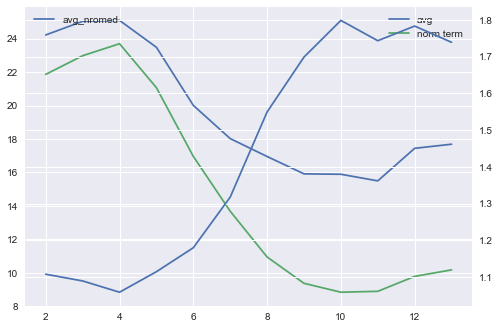


[24.218604831074238, 25.033087393515494, 25.087851296366924, 23.479870326035826, 20.007977871285323, 18.021231024238805, 16.951501072971546, 15.912183833081922, 15.889035502704774, 15.493432086905024, 17.439575529915228, 17.685359314509551]
Untargeted
Loading records:261276
Loading records:988769
Loading records:12513103
Loading records:31534565
Loading records:39339023
Loading records:39839029
Loading records:454Three 0 data at stage 1
Loading records:65155715
Loading records:66761168
Loading records:66861169
Loading records:67561176
Loading records:71966495
Loading records:72266498
Loading records:79170047
Loading records:81873053
Loading records:86977954
Loading records:1150125127
Loading records:1151Three 0 data at stage 1
Loading records:1181125160
Loading records:1201125181
Loading records:1415Three 0 data at stage 1
Loading records:1421152265
Loading records:1423152267
Loading records:1424152268
Loading records:1425152269
Loading records:1426152270
Loading records:1427152271
Lo

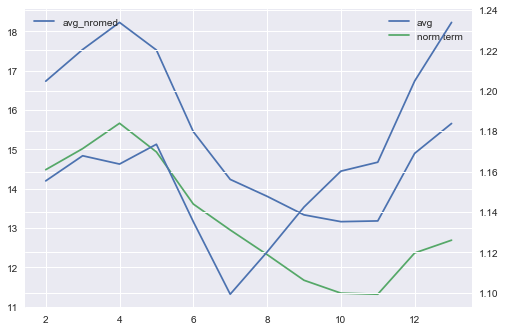


[16.729760132409517, 17.534319127903466, 18.223490786871995, 17.521171083568643, 15.44553662932535, 14.23307882691684, 13.803307071240393, 13.331605612163427, 13.159264848854091, 13.177624913304545, 14.895142841424052, 15.654689252470769]


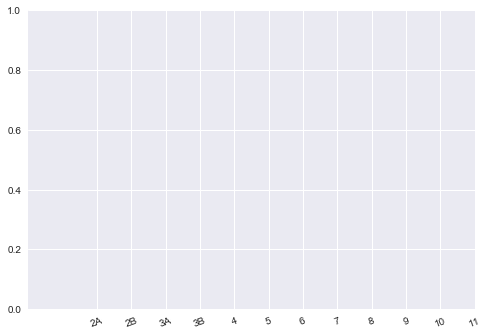

In [139]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
ins.LookALLMutationTargetedExon3(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

Targeted
Loading records:83173658
Loading records:97213516
Loading records:1062.82510063837
2.42673995466
1.77448280156
1.8819651671
2.42111902654
4.85445161533
12.0855190423
18.0008801754
26.0819315075
22.4376557158
27.8685753282
23.2771014096
[24.218604831074238, 25.033087393515494, 25.087851296366924, 23.479870326035826, 20.007977871285323, 18.021231024238805, 16.951501072971546, 15.912183833081922, 15.889035502704774, 15.493432086905024, 17.439575529915228, 17.685359314509551] [1.1078542784117462, 1.0894891890103451, 1.0588544130156161, 1.1146268348201236, 1.1798433183873855, 1.3175404701676785, 1.5491711459972235, 1.698435930977843, 1.7981986187204606, 1.7429633958037907, 1.7828058986021895, 1.7386430572843998] [21.860821682969675, 22.976902979876932, 23.693390694681767, 21.065229718630416, 16.958165172840324, 13.677933568101563, 10.942303642028925, 9.3687277470165071, 8.8360848113713342, 8.8891322240075112, 9.7820943623693104, 10.171932209094409]


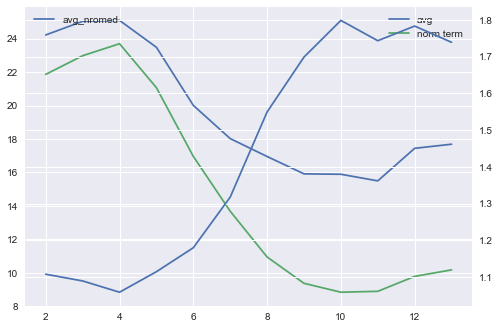


[24.218604831074238, 25.033087393515494, 25.087851296366924, 23.479870326035826, 20.007977871285323, 18.021231024238805, 16.951501072971546, 15.912183833081922, 15.889035502704774, 15.493432086905024, 17.439575529915228, 17.685359314509551]
Untargeted
Loading records:477954
Loading records:12213512
Loading records:35152268
Loading records:3961176
Loading records:67Three 0 data at stage 1
Loading records:1063.16475410655
3.1243947241
2.91917705918
3.02960205718
3.51894534013
5.90020703711
12.5203729024
14.4582742602
17.2184578814
15.3298539813
18.4954317621
18.311339941
[12.529184602529734, 13.387279711851361, 14.299263763191147, 14.538054258036329, 13.006163040531304, 12.402525770912199, 12.684544023576747, 12.716917912064686, 12.56620943071567, 12.204717415253182, 13.905401720241313, 14.720619696552795] [1.2562266170263299, 1.2623564809383971, 1.2554952056479598, 1.2556431372394137, 1.2494091645319223, 1.2951498748497579, 1.3829923549362275, 1.4167930757400613, 1.420070081326464, 1.3

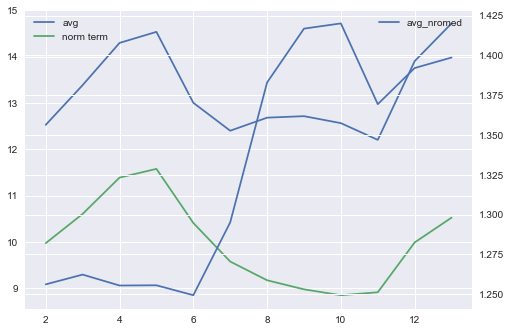


[12.529184602529734, 13.387279711851361, 14.299263763191147, 14.538054258036329, 13.006163040531304, 12.402525770912199, 12.684544023576747, 12.716917912064686, 12.56620943071567, 12.204717415253182, 13.905401720241313, 14.720619696552795]


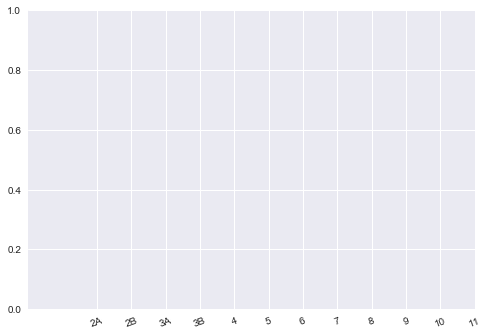

In [149]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_without_var["row_num"].sample(107))
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
ins.LookALLMutationTargetedExon3(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

In [ ]:
selected_exons = list(bp_exon_row_meta_with_var["row_num"])
Notselected_genes_exons = list(bp_exon_row_meta.sample(1000)["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_genes_exons)]))
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

### Exon Length / Pos Anly

small
Loading records:75
large
Loading records:30
large_nonlast
Loading records:26
last
Loading records:5


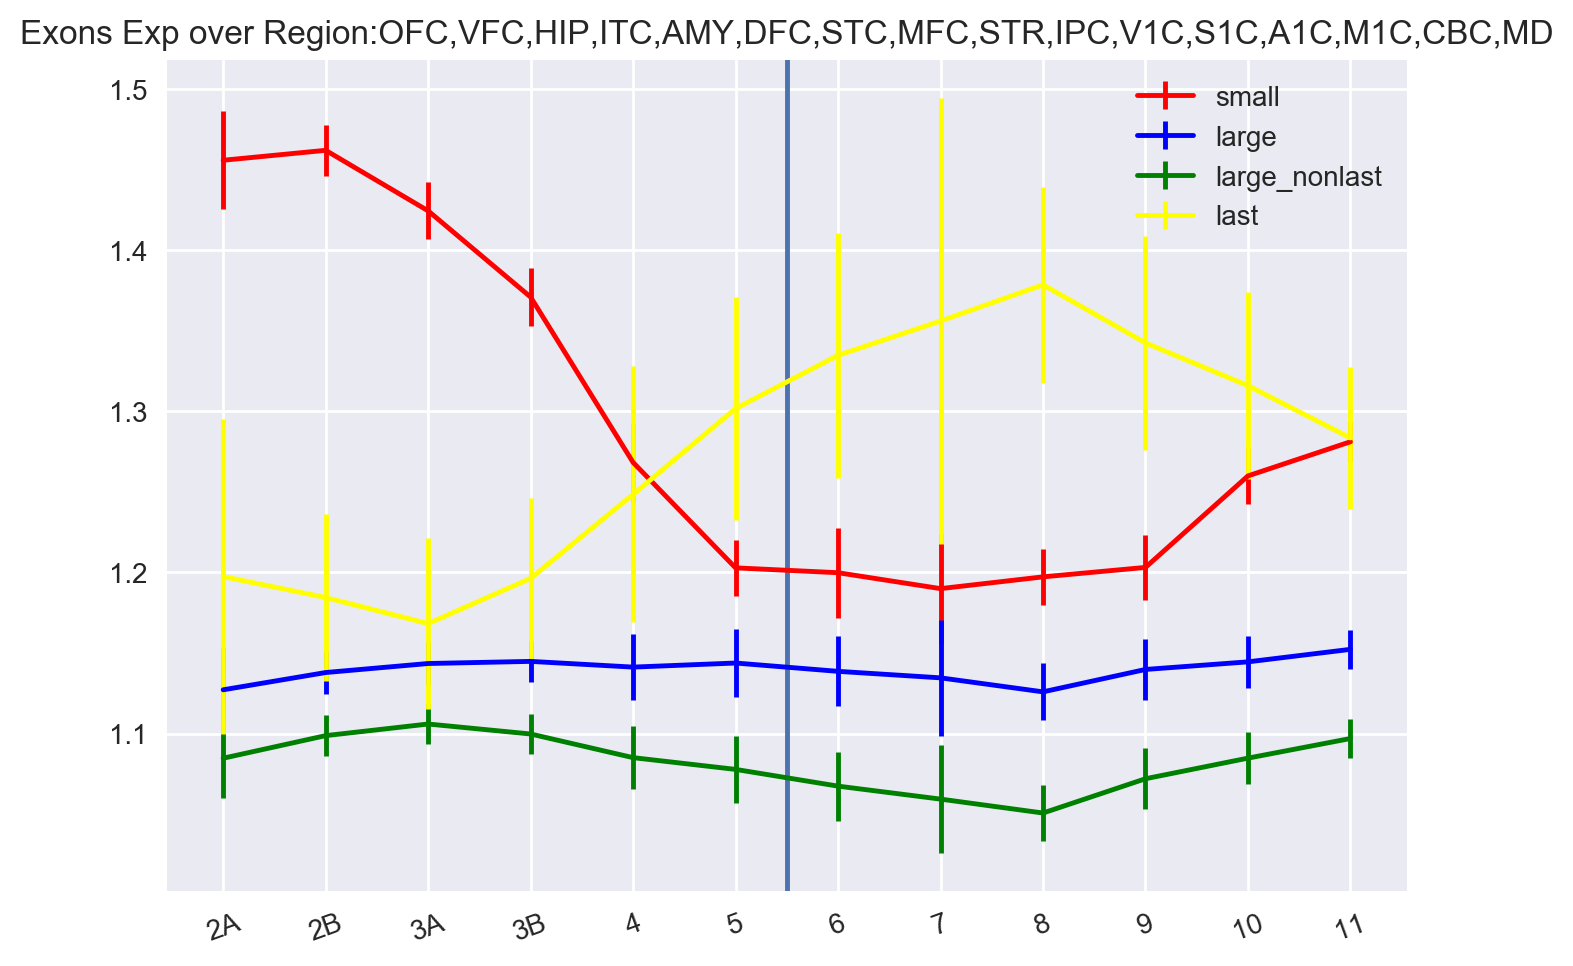

small
Loading records:75
large
Loading records:30
large_nonlast
Loading records:26
last
Loading records:5


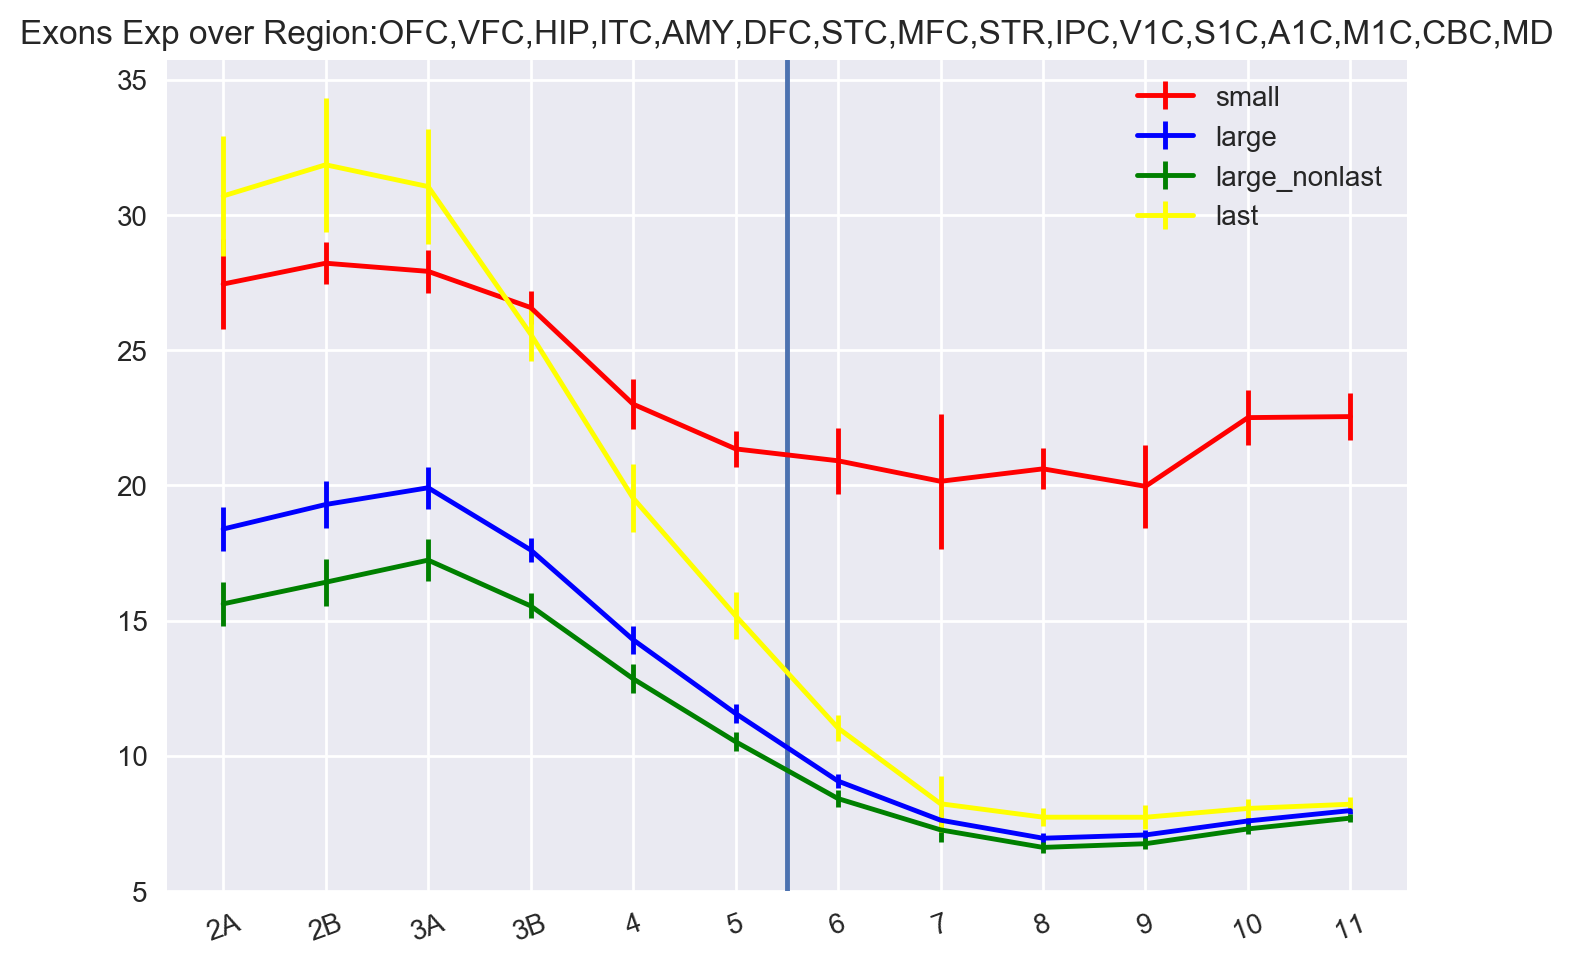

In [16]:
small_exons = ('red', list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var
                                             ["exon length"]<1000]["row_num"]))
large_exons = ('blue', list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var
                                             ["exon length"]>1000]["row_num"]))
large_nonlast_exons = ('green', list(bp_exon_row_meta_with_var[ (bp_exon_row_meta_with_var
            ["exon length"]>1000) & (bp_exon_row_meta_with_var["Last"]=="F") ]["row_num"]))
large_last_exons = ('yellow', list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var
                                                  ["Last"]=="T"]["row_num"]))
Size = dict(zip(["small", "large", "large_nonlast", "last"],
              [small_exons, large_exons, large_nonlast_exons, large_last_exons]))
ins.LookALLMutationTargetedExon(Size, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)
ins.LookALLMutationTargetedExon(Size, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, ExonExp)

small
Loading records:2031
large
Loading records:129
large_nonlast
Loading records:99
last
Loading records:88


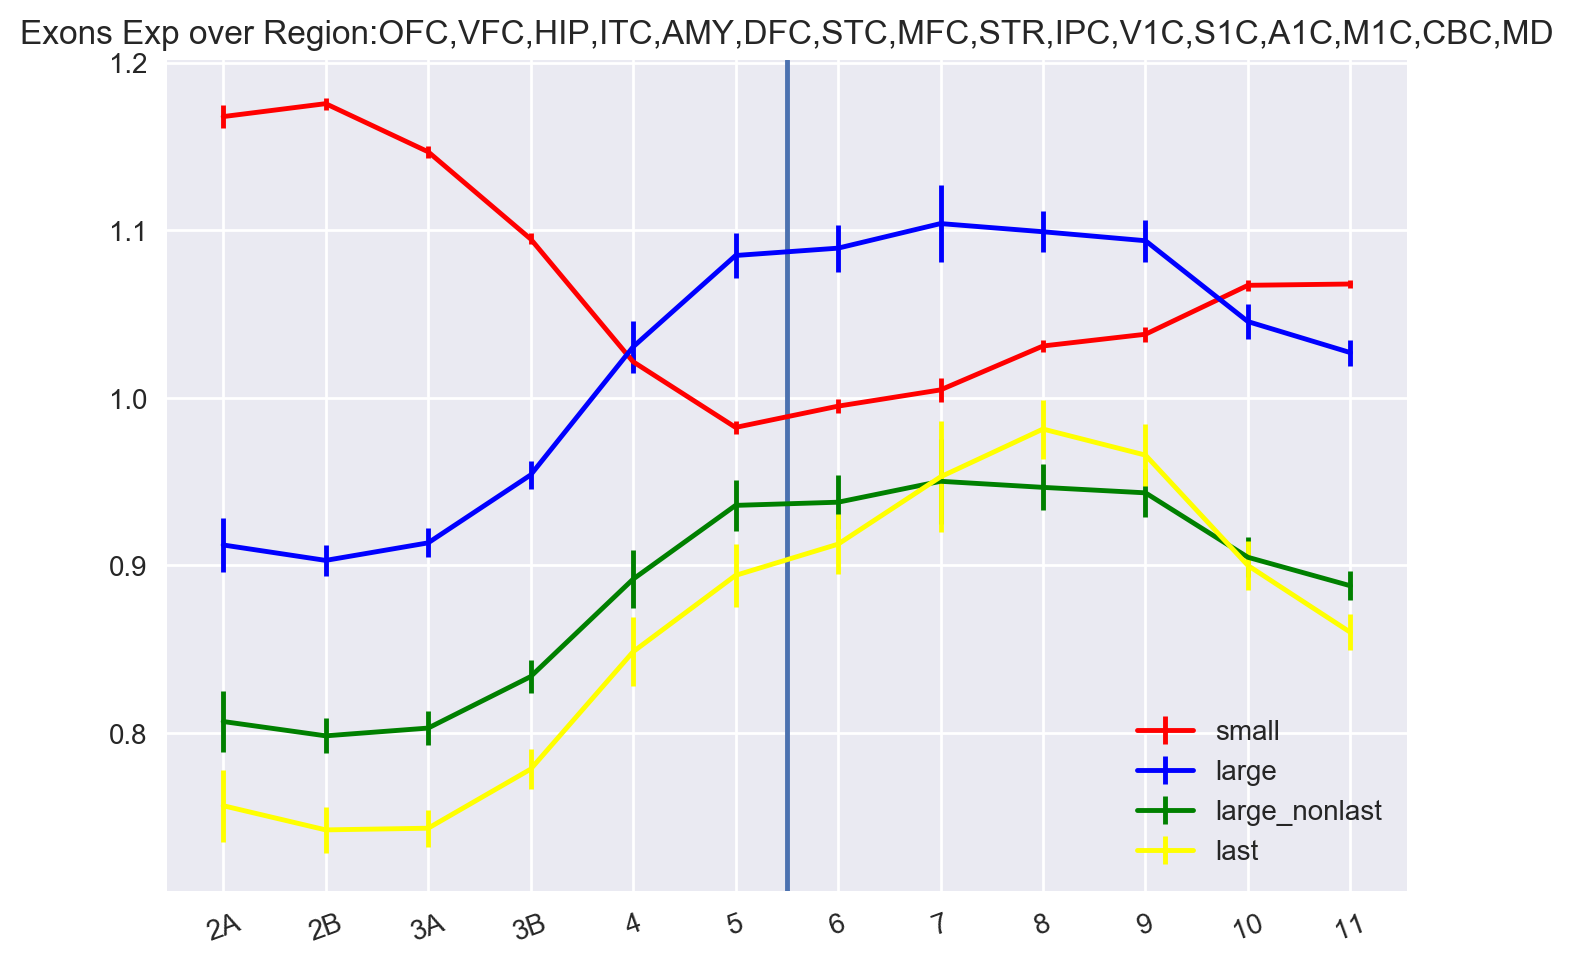

small
Loading records:2031
large
Loading records:129
large_nonlast
Loading records:99
last
Loading records:88


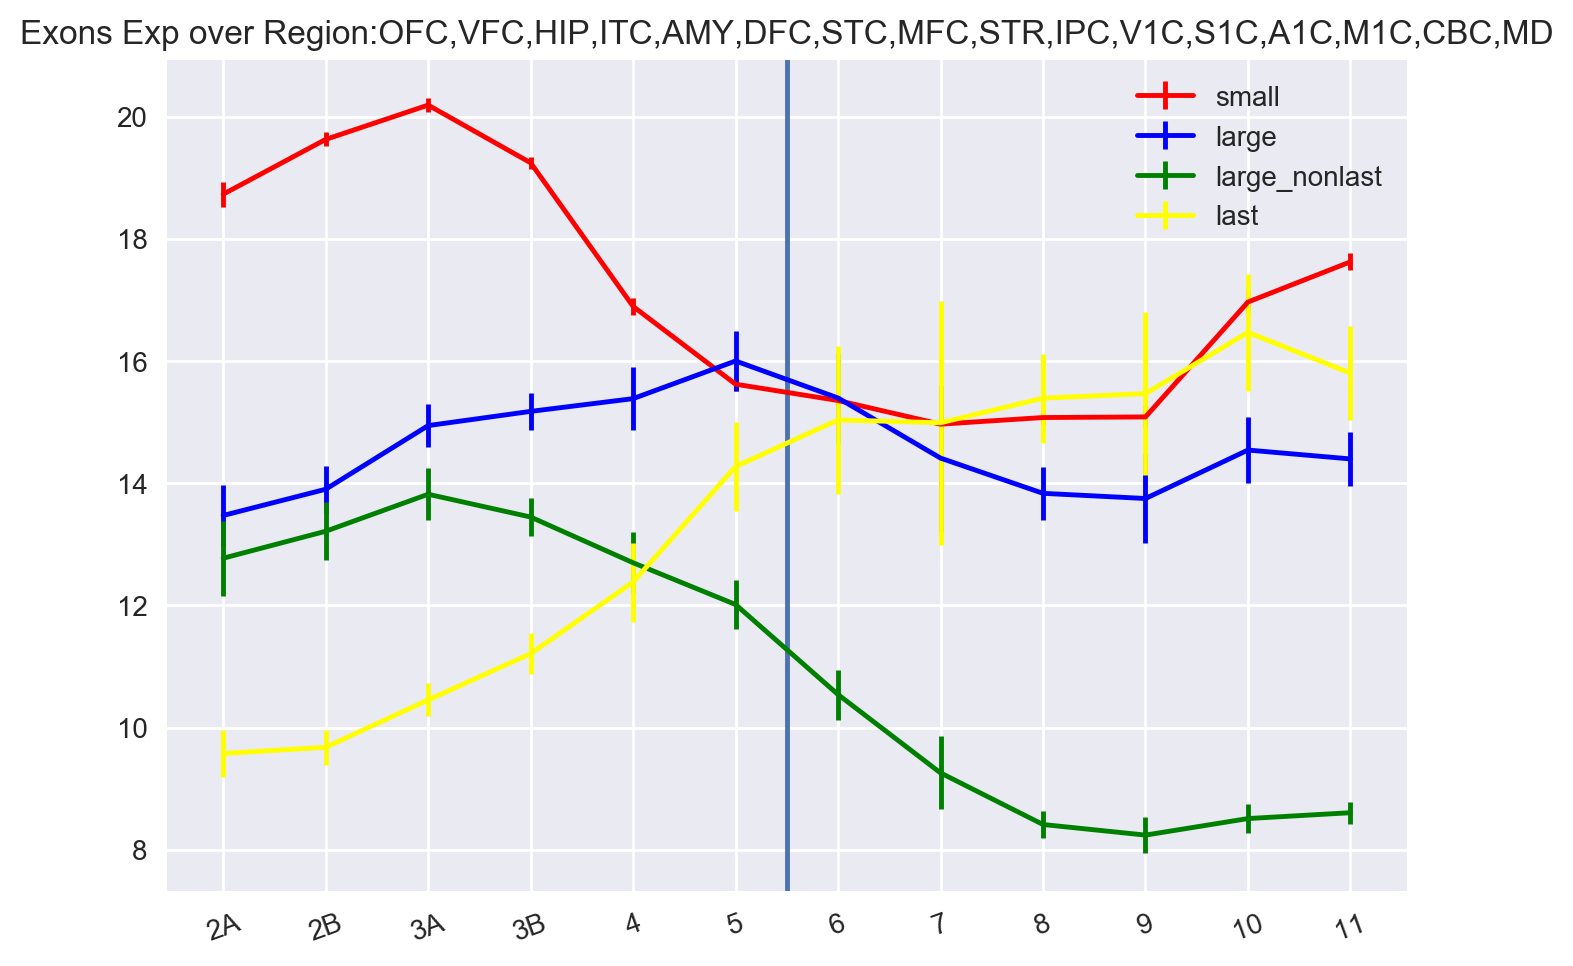

In [17]:

small_exons = ('red', list(bp_exon_row_meta_without_var[bp_exon_row_meta_without_var
                                             ["exon length"]<1000]["row_num"]))
large_exons = ('blue', list(bp_exon_row_meta_without_var[bp_exon_row_meta_without_var
                                             ["exon length"]>1000]["row_num"]))
large_nonlast_exons = ('green', list(bp_exon_row_meta_without_var[ (bp_exon_row_meta_without_var
            ["exon length"]>1000) & (bp_exon_row_meta_without_var["Last"]=="F") ]["row_num"]))
large_last_exons = ('yellow', list(bp_exon_row_meta_without_var[bp_exon_row_meta_without_var
                                                  ["Last"]=="T"]["row_num"]))
Size = dict(zip(["small", "large", "large_nonlast", "last"],
              [small_exons, large_exons, large_nonlast_exons, large_last_exons]))
ins.LookALLMutationTargetedExon(Size, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)
ins.LookALLMutationTargetedExon(Size, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, ExonExp)

In [18]:
small_exons = bp_exon_row_meta_with_var[bp_exon_row_meta_with_var
                                             ["exon length"]<1000]
large_nonlast_exons = bp_exon_row_meta_without_var[ (bp_exon_row_meta_without_var
            ["exon length"]>1000) & (bp_exon_row_meta_without_var["Last"]=="F") ]
large_last_exons = bp_exon_row_meta_with_var[bp_exon_row_meta_with_var
                                                  ["Last"]=="T"]
display(small_exons.head())
display(large_last_exons)

row_num    gene_id  ensembl_gene_id gene_symbol  entrez_id  \
1264    1265.0  1086943.0  ENSG00000005108      THSD7A   221981.0   
5920    5921.0  1087222.0  ENSG00000015171     ZMYND11    10771.0   
6699    6700.0  1087275.0  ENSG00000021574       SPAST     6683.0   
8759    8760.0  1087398.0  ENSG00000036257        CUL3     8452.0   
11545  11546.0  1087537.0  ENSG00000049618      ARID1B    57492.0   

             start          end  exon length NVIQ70 VIQ70 Gender       Func  \
1264    11486856.0   11487051.0        195.0     79    85     pM              
5920      293337.0     293406.0         69.0     88    92     pM  chromatin   
6699    32339706.0   32339894.0        188.0    113    82     pM              
8759   225376070.0  225376299.0        229.0     80    85     pM              
11545  157510775.0  157510914.0        139.0     71    96     pF  chromatin   

              Vars GeneHited Last  
1264    7:11487022         T    F  
5920     10:293337         T    F  
6699    2:32339777         T    F  
8759   2:225376218         T    F  
11545  6:157510806         T    F

row_num    gene_id  ensembl_gene_id gene_symbol  entrez_id  \
11551    11552.0  1087537.0  ENSG00000049618      ARID1B    57492.0   
74591    74592.0  1091834.0  ENSG00000119669     IRF2BPL    64207.0   
77999    78000.0  1092117.0  ENSG00000121904       CSMD2   114784.0   
105019  105020.0  1094209.0  ENSG00000136535        TBR1    10716.0   
210110  210111.0  1103465.0  ENSG00000188064       WNT7B     7477.0   
219685  219686.0  1104369.0  ENSG00000197724        PHF2     5253.0   

              start          end  exon length NVIQ70 VIQ70 Gender       Func  \
11551   157527300.0  157530401.0       3101.0     51    32     pF  chromatin   
74591    77490887.0   77495034.0       4147.0     74    83     pM              
77999    34631347.0   34631443.0         96.0    109   101     pM              
105019  162274711.0  162282381.0       7670.0     63    69     pF              
210110   46372563.0   46373009.0        446.0     67    43     pM              
219685   96439869.0   96441869.0       2000.0     90    92     pM  chromatin   

               Vars GeneHited Last  
11551   6:157527665         T    T  
74591   14:77492034         T    T  
77999    1:34631391         T    T  
105019  2:162275482         T    T  
210110  22:46372611         T    T  
219685   9:96439930         T    T

In [19]:
mutations = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_2.xlsx")
smallexonGenes = mutations[mutations["effectGene"].isin(list(small_exons["gene_symbol"]))]
lastexonGenes = mutations[mutations["effectGene"].isin(list(large_last_exons["gene_symbol"]))]
largenonlastexonGenes = mutations[mutations["effectGene"].isin(list(large_nonlast_exons["gene_symbol"]))]
display(lastexonGenes)
#display(largenonlastexonGenes)
#display(largenonlastexonGenes[largenonlastexonGenes["effectType"]=="missense"])
#display(smallexonGenes[smallexonGenes["effectType"]=="missense"])

familyId     location    variant           vcfVariant inChild  \
106      14332   1:34070979  sub(G->A)       1:34070979:G:A      pM   
326      14393  6:157510806     ins(C)     6:157510805:A:AC      pF   
336      13447  6:157527665     del(4)  6:157527664:CTGTT:C      pF   
790      13814  2:162273603  sub(A->G)      2:162273603:A:G      pM   
1119     12030   1:34631391     del(1)      1:34631390:CG:C      pM   
2042     13852  6:157150572  sub(C->T)      6:157150572:C:T      sF   
2044     14406  6:157525120  sub(A->G)      6:157525120:A:G      pM   
2201     13382  14:77492034     del(1)     14:77492033:GT:G      pM   
3480     13903   9:96437988  sub(C->T)       9:96437988:C:T      pM   
3493     12323   9:96439930     del(1)      9:96439929:AT:A      pM   
3858     11480  14:77494046  sub(G->C)      14:77494046:G:C      pM   
4669     11480  2:162273323     del(1)     2:162273322:AC:A      pM   
4673     13796  2:162275482     ins(C)     2:162275481:A:AC      pF   
5356     13033  22:46372611  sub(C->T)      22:46372611:C:T      pM   

     fromParent effectGene   effectType familyDescription              CSHL  \
106         NaN      CSMD2   synonymous                pM            strong   
326         NaN     ARID1B  frame-shift              pFsM      strong:valid   
336         NaN     ARID1B  frame-shift              pFsF               NaN   
790         NaN       TBR1     missense              pMsF               NaN   
1119        NaN      CSMD2  frame-shift              pMsF            strong   
2042        NaN     ARID1B       intron              pMsF               NaN   
2044        NaN     ARID1B     missense              pMsM               NaN   
2201        NaN    IRF2BPL  frame-shift                pM      strong:valid   
3480        NaN       PHF2     nonsense              pMsM  not called:valid   
3493        NaN       PHF2  frame-shift              pMsF      strong:valid   
3858        NaN    IRF2BPL     missense                pM               NaN   
4669        NaN       TBR1  frame-shift                pM               NaN   
4673        NaN       TBR1  frame-shift                pF               NaN   
5356        NaN      WNT7B     nonsense                pM               NaN   

                  YALE            UW IossifovWE2012 EichlerWE2012 StateWE2012  \
106                NaN           NaN            NaN           NaN         NaN   
326                NaN           NaN            NaN           NaN         NaN   
336                NaN  strong:valid            NaN           yes         NaN   
790   not called:valid           NaN            NaN           NaN         NaN   
1119               NaN           NaN            NaN           NaN         NaN   
2042            strong           NaN            NaN           NaN         NaN   
2044               NaN        strong            NaN           NaN         NaN   
2201               NaN  strong:valid            NaN           NaN         NaN   
3480               NaN           NaN            NaN           NaN         NaN   
3493               NaN           NaN            yes           NaN         NaN   
3858               NaN  strong:valid            NaN           yes         NaN   
4669               NaN  strong:valid            NaN           yes         NaN   
4673      strong:valid           NaN            NaN           NaN         NaN   
5356      strong:valid  strong:valid            NaN           NaN         NaN   

     EichlerTG2012  
106            NaN  
326            yes  
336            NaN  
790            yes  
1119           NaN  
2042           NaN  
2044           NaN  
2201           NaN  
3480           NaN  
3493           NaN  
3858           NaN  
4669           NaN  
4673           yes  
5356           NaN

In [20]:
A = set(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var["exon length"]<1000]["gene_symbol"])
A = GeneRow[GeneRow["gene_symbol"].isin(A)]
display(A.head(2))
B = set(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var["exon length"]>1000]["gene_symbol"])
B = GeneRow[GeneRow["gene_symbol"].isin(B)]
display(B.head(2))
C = set(bp_exon_row_meta_with_var[ (bp_exon_row_meta_with_var
            ["exon length"]>1000) & (bp_exon_row_meta_with_var["Last"]=="F") ]["gene_symbol"])
C = GeneRow[GeneRow["gene_symbol"].isin(C)]
display(C.head(2))
D = set(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var
                                                  ["Last"]=="T"]["gene_symbol"])
D = GeneRow[GeneRow["gene_symbol"].isin(D)] 
display(D.head(2))

row_num  gene_id  ensembl_gene_id gene_symbol  entrez_id
81        82  85821.0  ENSG00000005108      THSD7A   221981.0
360      361  10613.0  ENSG00000015171     ZMYND11    10771.0

row_num  gene_id  ensembl_gene_id gene_symbol  entrez_id
122      123   8900.0  ENSG00000006062     MAP3K14     9020.0
674      675  36765.0  ENSG00000049618      ARID1B    57492.0

row_num  gene_id  ensembl_gene_id gene_symbol  entrez_id
122      123   8900.0  ENSG00000006062     MAP3K14     9020.0
942      943  22768.0  ENSG00000065526        SPEN    23013.0

row_num  gene_id  ensembl_gene_id gene_symbol  entrez_id
674       675  36765.0  ENSG00000049618      ARID1B    57492.0
4977     4978  40840.0  ENSG00000119669     IRF2BPL    64207.0

FemaleExons
Loading records:27
MaleExons
Loading records:80
MaleGenesOtherExons
Loading records:1621
FemaleGenesOtherExons
Loading records:574


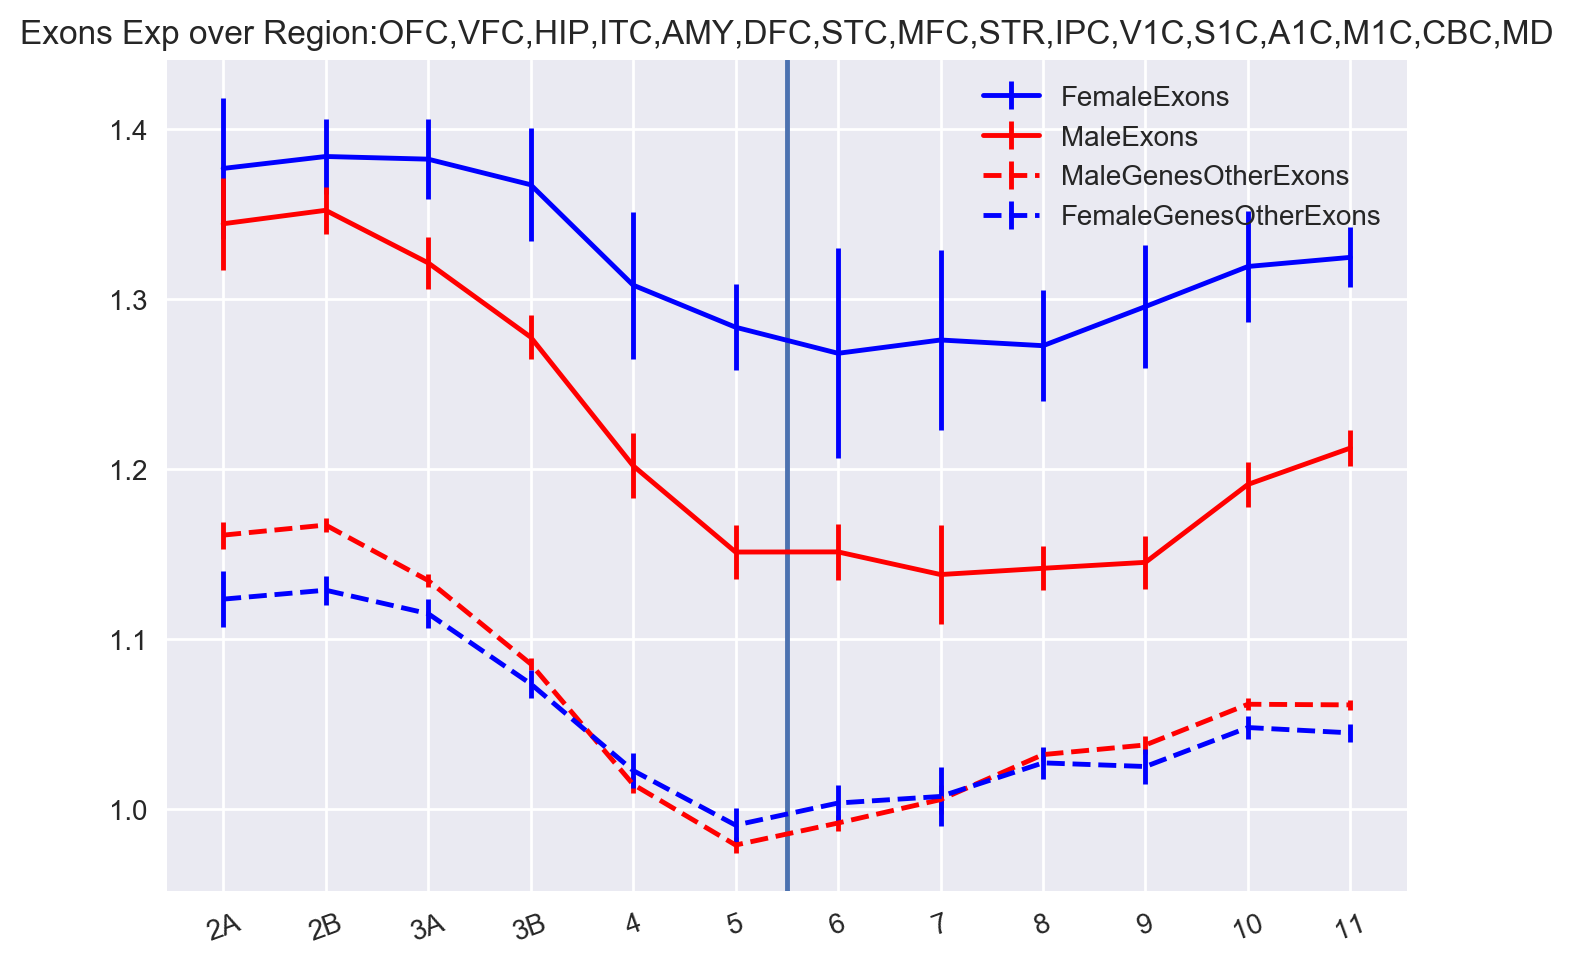

FemaleExons
Loading records:27
MaleExons
Loading records:80
MaleGenesOtherExons
Loading records:1621
FemaleGenesOtherExons
Loading records:574


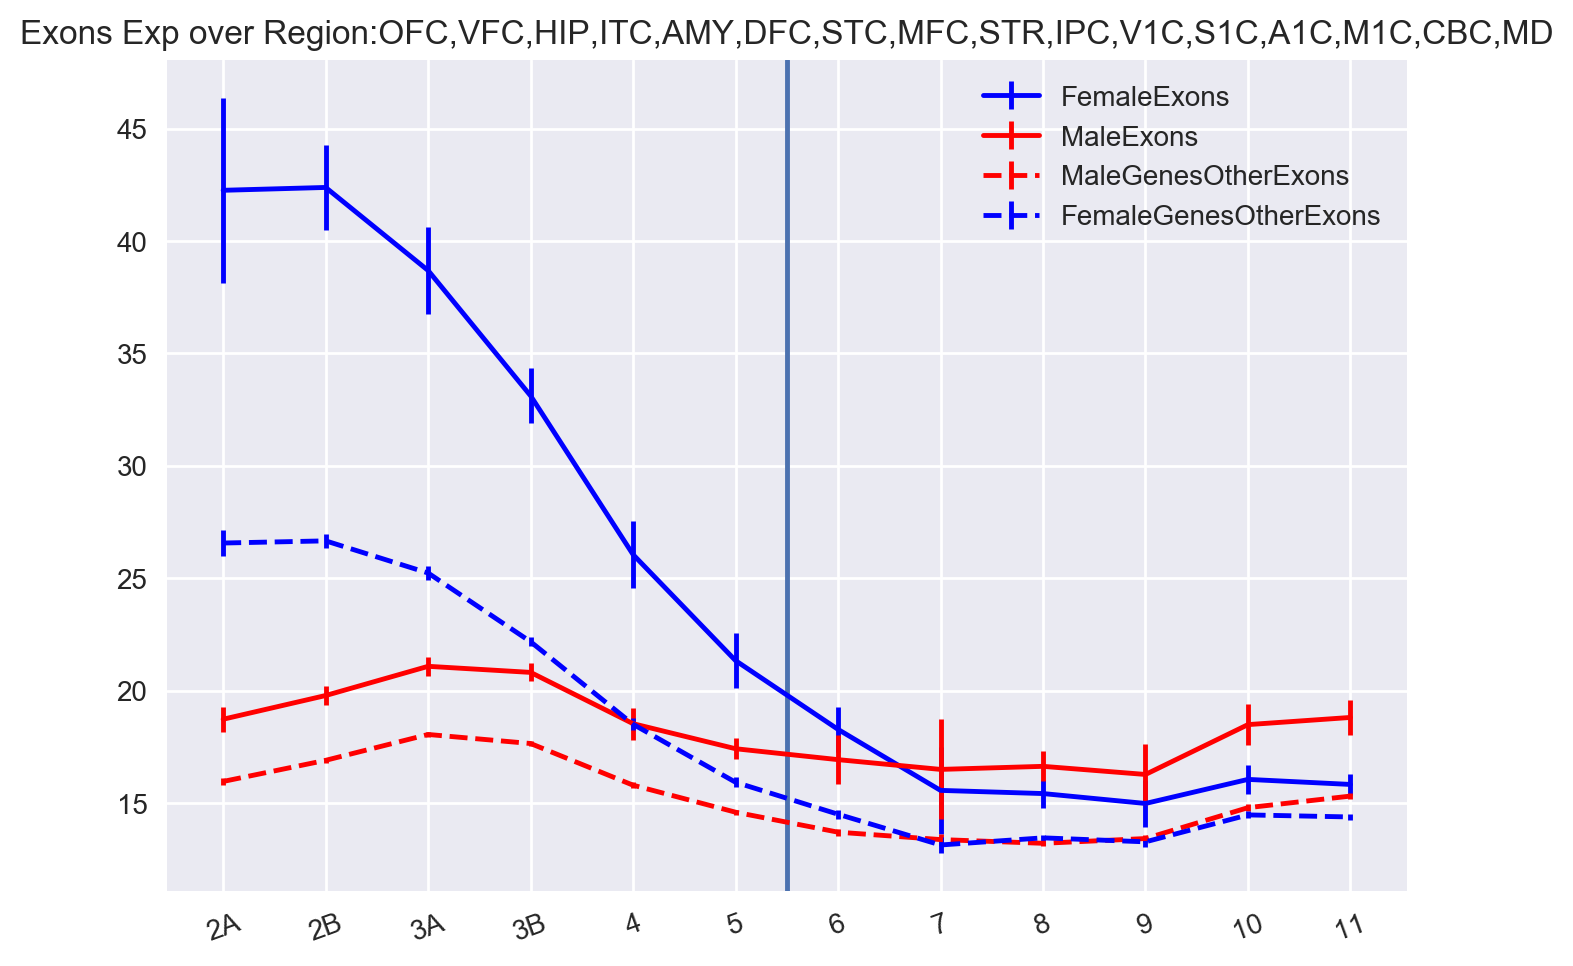

In [64]:
#display(bp_exon_row_meta_with_var.head())
Male_exons = ("red", list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pM", "pM;pM","pM;pF"])]["row_num"]))
FeMale_exons = ("blue", list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pF","pM;pF"])]["row_num"]))
Male_genes = list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pM", "pM;pM","pM;pF"])]["gene_symbol"])
FeMale_genes = list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pF","pM;pF"])]["gene_symbol"])
Male_unTexons = ("red", list(bp_exon_row_meta_without_var[
    bp_exon_row_meta_without_var["gene_symbol"].isin(Male_genes)]["row_num"]))
FeMale_unTexons = ("blue", list(bp_exon_row_meta_without_var[
    bp_exon_row_meta_without_var["gene_symbol"].isin(FeMale_genes)]["row_num"]))
Male_FeMale = dict(zip(["MaleExons", "FemaleExons", "MaleGenesOtherExons", "FemaleGenesOtherExons"],
                       [Male_exons, FeMale_exons, Male_unTexons, FeMale_unTexons]))
#print Male_FeMale
ins.LookALLMutationTargetedExon(Male_FeMale, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)
ins.LookALLMutationTargetedExon(Male_FeMale, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, ExonExp)

FemaleExons
Loading records:27
MaleExons
Loading records:80
MaleGenesOtherExons
Loading records:1621
FemaleGenesOtherExons
Loading records:574


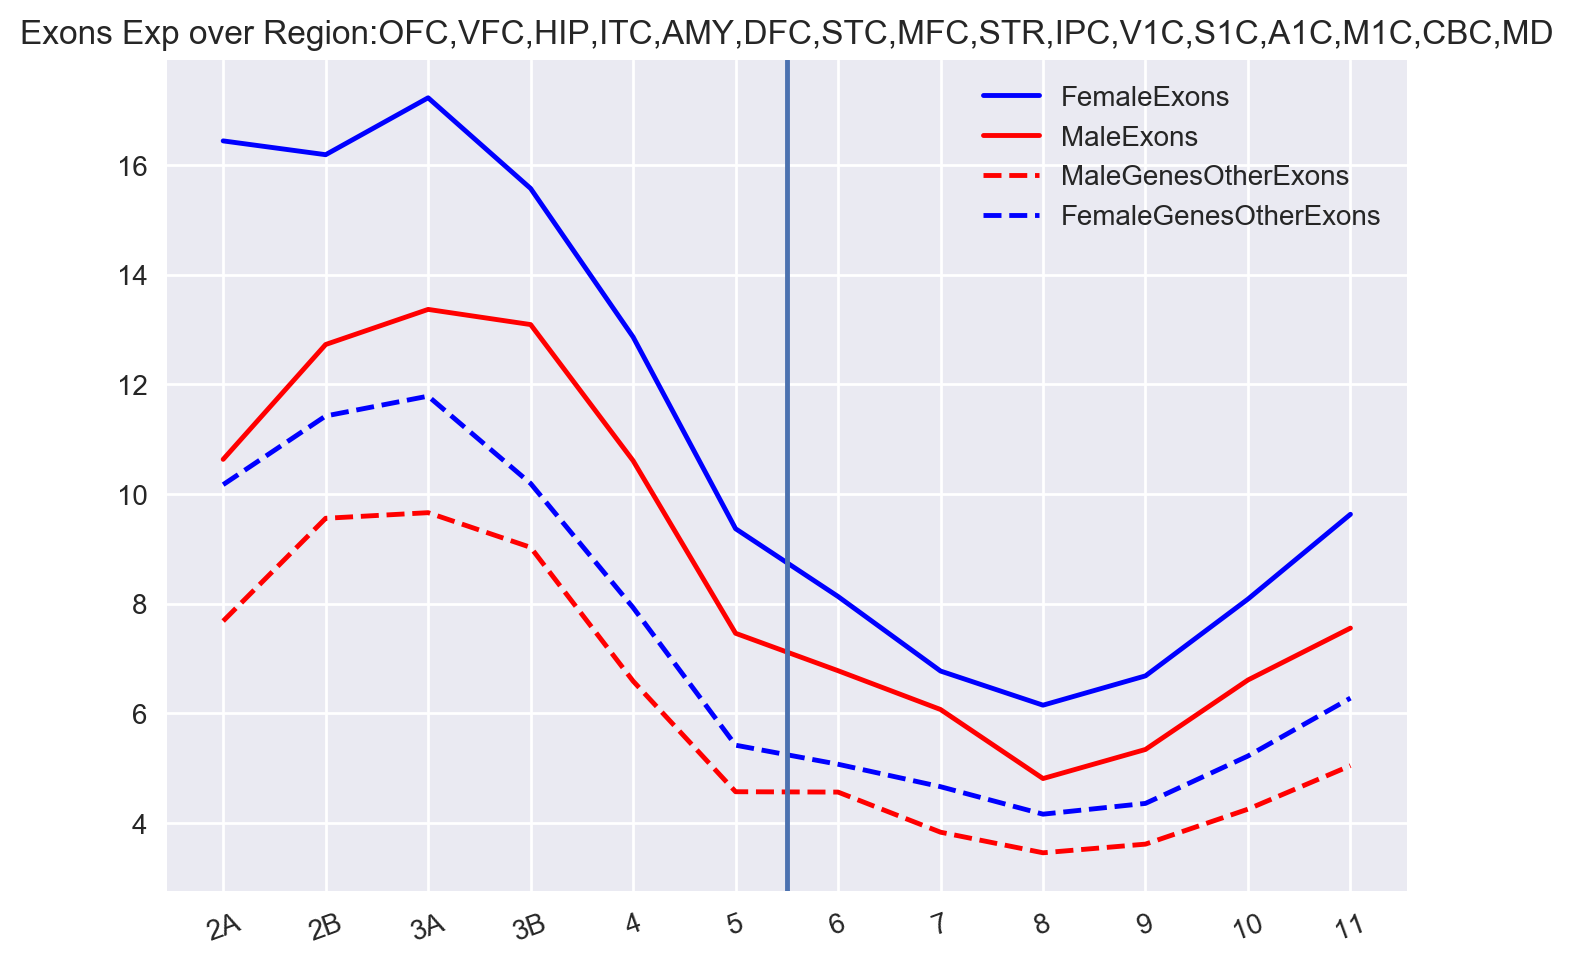

In [62]:
#display(bp_exon_row_meta_with_var.head())
Male_exons = ("red", list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pM", "pM;pM","pM;pF"])]["row_num"]))
FeMale_exons = ("blue", list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pF","pM;pF"])]["row_num"]))
Male_genes = list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pM", "pM;pM","pM;pF"])]["gene_symbol"])
FeMale_genes = list(bp_exon_row_meta_with_var[
    bp_exon_row_meta_with_var["Gender"].isin(["pF","pM;pF"])]["gene_symbol"])
Male_unTexons = ("red", list(bp_exon_row_meta_without_var[
    bp_exon_row_meta_without_var["gene_symbol"].isin(Male_genes)]["row_num"]))
FeMale_unTexons = ("blue", list(bp_exon_row_meta_without_var[
    bp_exon_row_meta_without_var["gene_symbol"].isin(FeMale_genes)]["row_num"]))
Male_FeMale = dict(zip(["MaleExons", "FemaleExons", "MaleGenesOtherExons", "FemaleGenesOtherExons"],
                       [Male_exons, FeMale_exons, Male_unTexons, FeMale_unTexons]))
#print Male_FeMale
#ins.LookALLMutationTargetedExon(Male_FeMale, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)
ins.LookALLMutationTargetedExon(Male_FeMale, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, ExonExp)

psd_Target_exon
Loading records:9
chromatin_Target_exon
Loading records:23
channel_Other_exon
Loading records:36
channel_Target_exon
Loading records:3
sig_skel_Other_exon
Loading records:68
psd_Other_exon
Loading records:248
sig_skel_Target_exon
Loading records:3
chromatin_Other_exon
Loading records:362


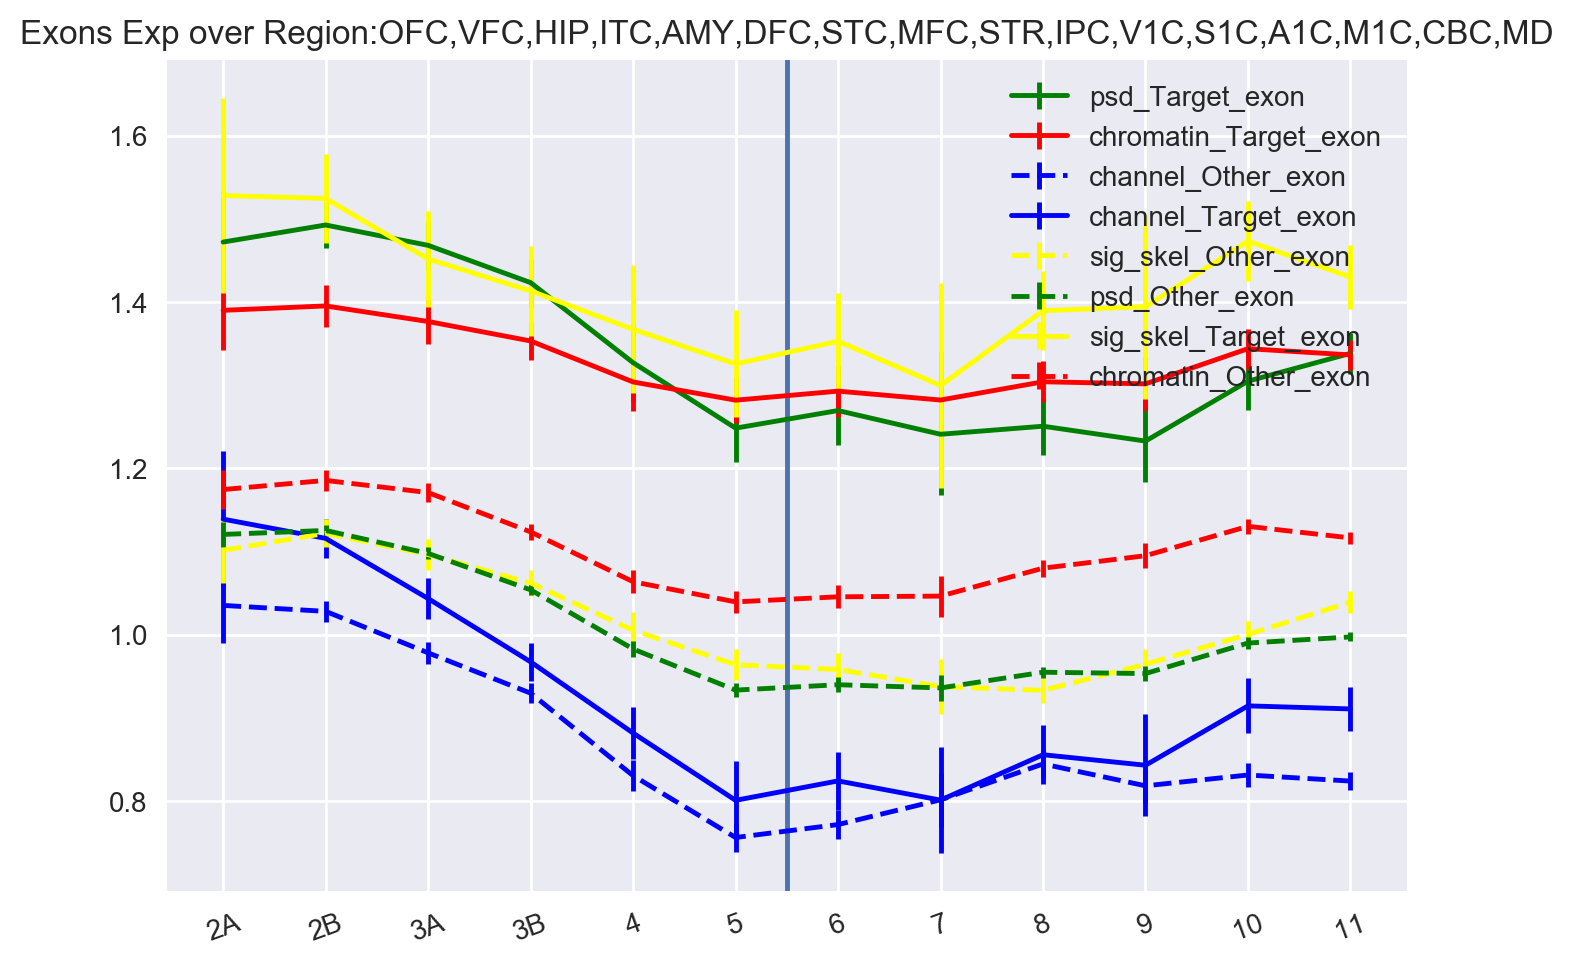

In [39]:
cates = {}
color=["red", "blue", "yellow", "green"]
for i,func in enumerate(["chromatin", "channel", "sig_skel", "psd"]):
    cates[func+"_Target_exon"] = (color[i], 
                    list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var.Func.str.contains(func)]["row_num"]))
    cates[func+"_Other_exon"] = (color[i], 
                    list(bp_exon_row_meta_without_var[bp_exon_row_meta_without_var.Func.str.contains(func)]["row_num"]))
ins.LookALLMutationTargetedExon(cates, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)

psd_Target_exon
Loading records:9
chromatin_Target_exon
Loading records:23
channel_Other_exon
Loading records:36
channel_Target_exon
Loading records:3
sig_skel_Other_exon
Loading records:68
psd_Other_exon
Loading records:248
sig_skel_Target_exon
Loading records:3
chromatin_Other_exon
Loading records:362


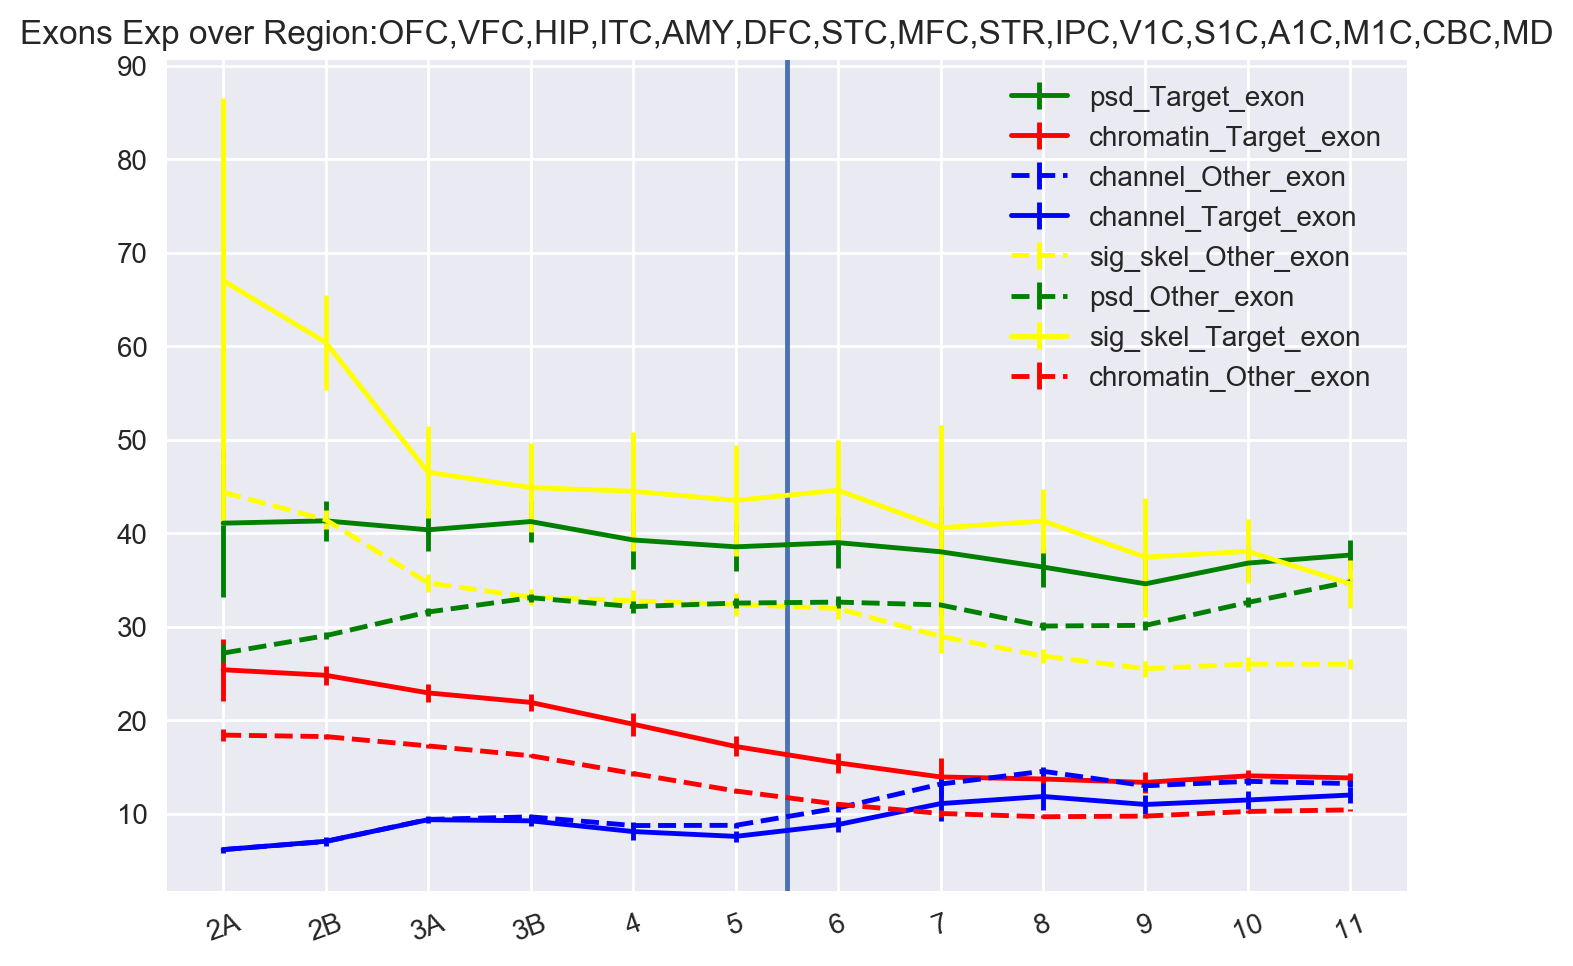

In [41]:
cates = {}
color=["red", "blue", "yellow", "green"]
for i,func in enumerate(["chromatin", "channel", "sig_skel", "psd"]):
    cates[func+"_Target_exon"] = (color[i], 
                    list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var.Func.str.contains(func)]["row_num"]))
    cates[func+"_Other_exon"] = (color[i], 
                    list(bp_exon_row_meta_without_var[bp_exon_row_meta_without_var.Func.str.contains(func)]["row_num"]))
ins.LookALLMutationTargetedExon(cates, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, ExonExp)

LVIQ
Loading records:39
HNVIQ
Loading records:59
HVIQ
Loading records:61
LNVIQ
Loading records:46


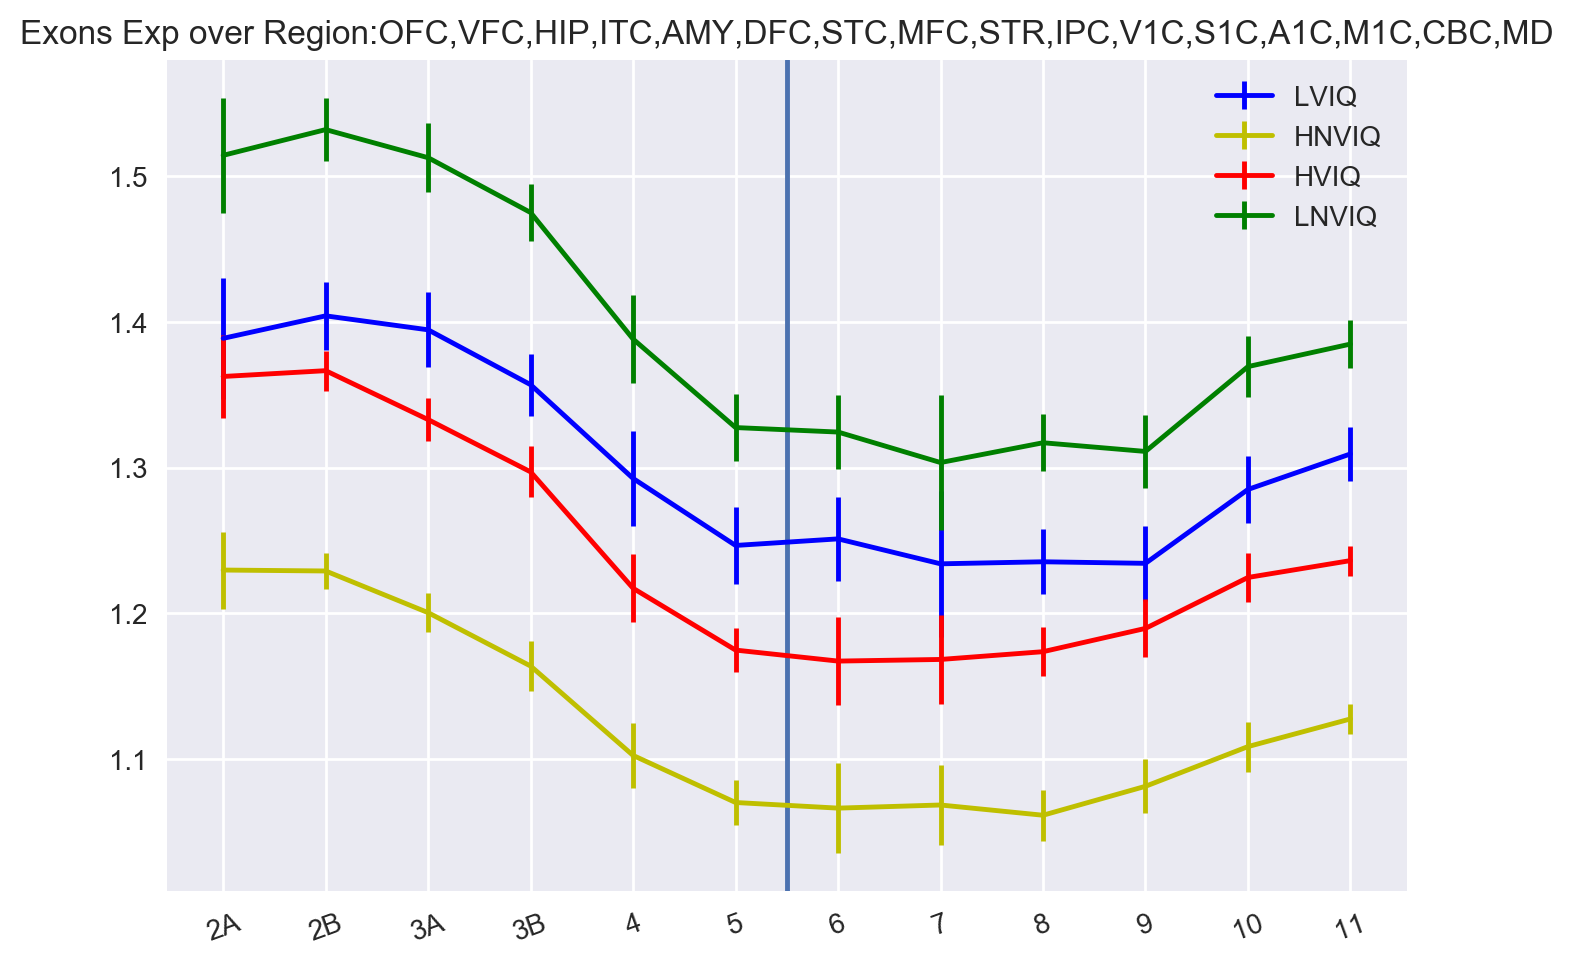

In [25]:
HVIQ_exons = list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var["VIQ70"]>70]["row_num"])
LVIQ_exons = list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var["VIQ70"]<70]["row_num"])
HNVIQ_exons = list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var["NVIQ70"]>70]["row_num"])
LNVIQ_exons = list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var["NVIQ70"]<70]["row_num"])
IQ = dict(zip(["HVIQ", "LVIQ", "HNVIQ", "LNVIQ"],[('r',HVIQ_exons), ('b',LVIQ_exons),
                                                  ('y',HNVIQ_exons), ('g',LNVIQ_exons)]))
ins.LookALLMutationTargetedExon(IQ, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)

LVIQ
Loading records:39
HNVIQ
Loading records:59
HVIQ
Loading records:61
LNVIQ
Loading records:46


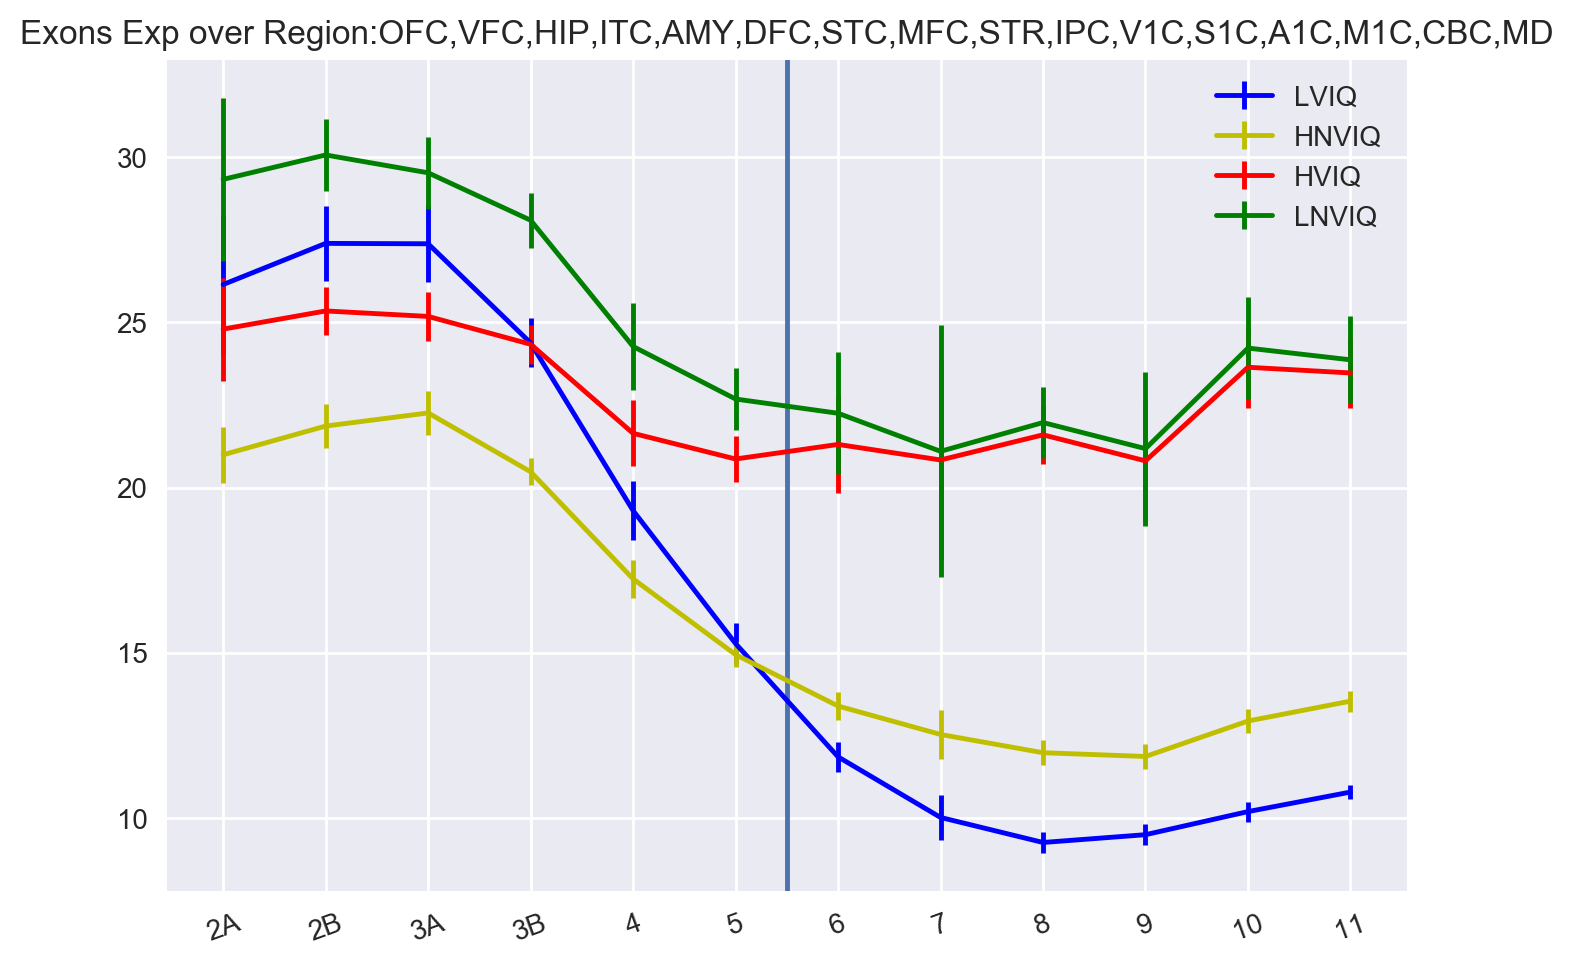

In [26]:
ins.LookALLMutationTargetedExon(IQ, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, ExonExp)

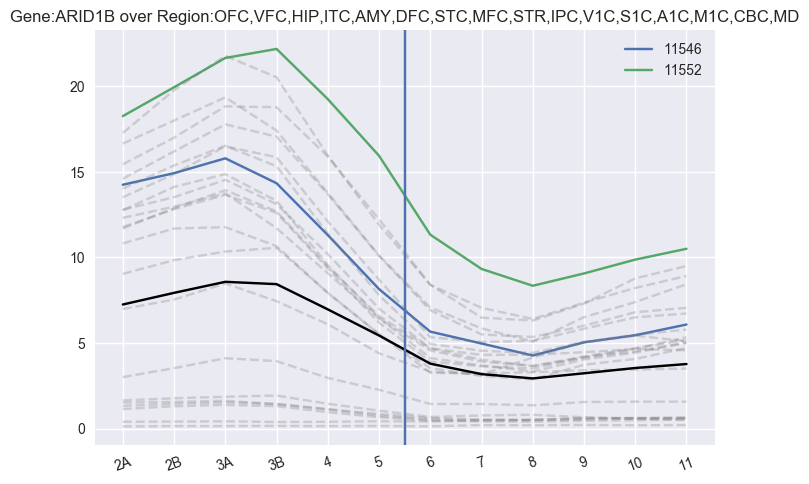

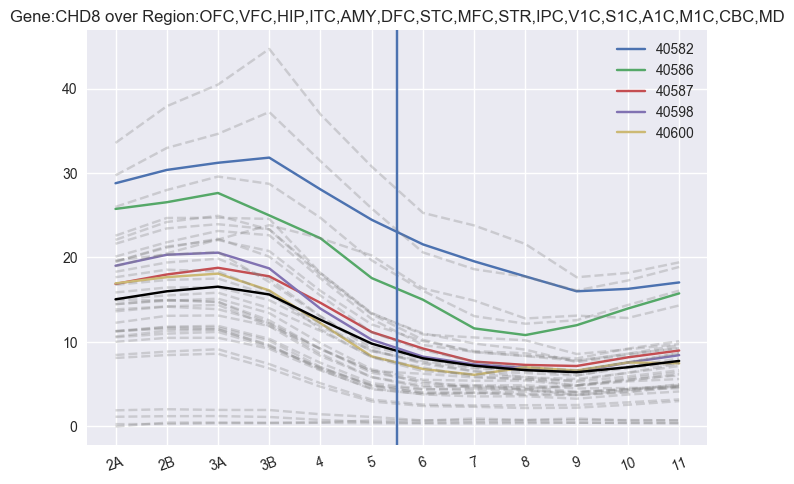

In [65]:
#chromatin
for gene in ["ARID1B", "CHD8"]:
    ins.LookGeneExonSumOverRegionwithTargetUntarget(gene, Regionsgt20, 
                                                    bp_exon_row_meta_with_gene, bp_exon_col_meta, ExonExp, GeneDat=GeneDat)

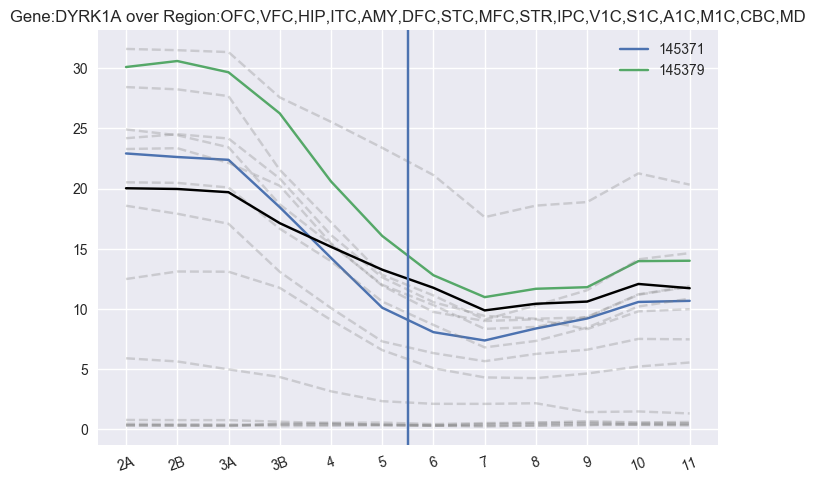

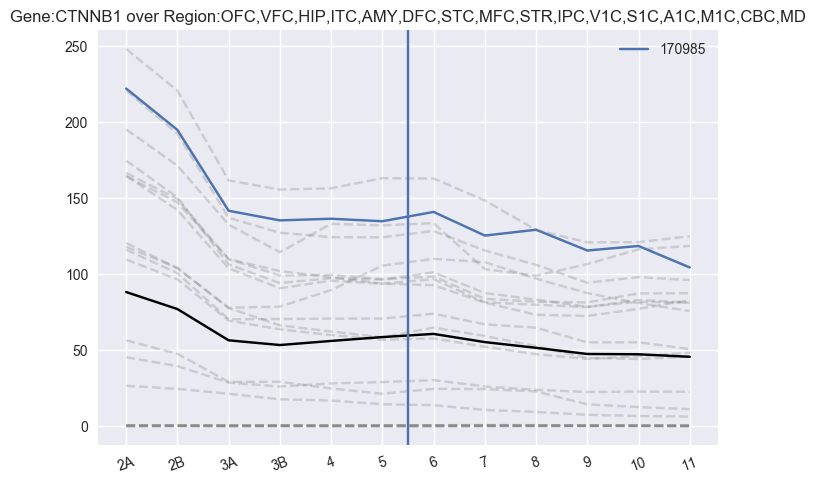

In [66]:
#sig_skel
for gene in ["DYRK1A", "CTNNB1"]:
    ins.LookGeneExonSumOverRegionwithTargetUntarget(gene, Regionsgt20, 
                                                    bp_exon_row_meta_with_gene, bp_exon_col_meta, ExonExp, GeneDat=GeneDat)

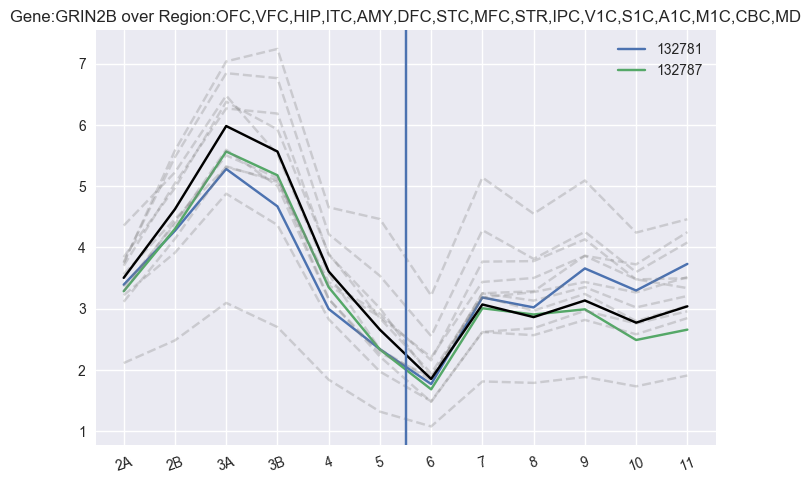

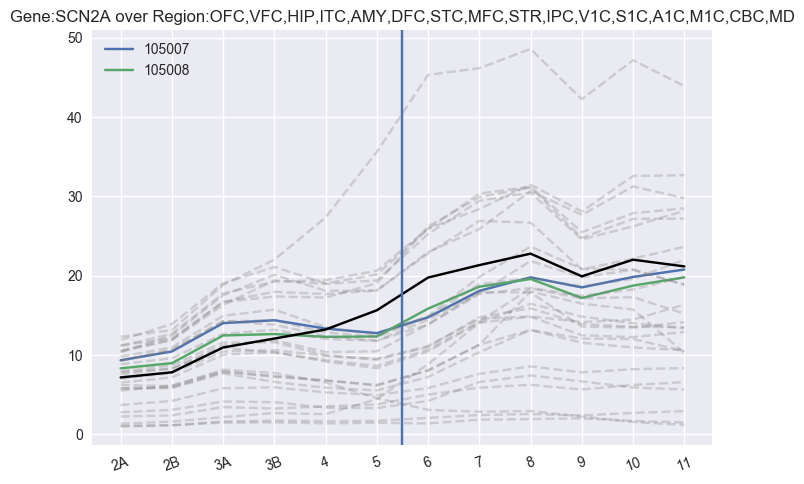

In [67]:
#channel
for gene in ["GRIN2B", "SCN2A"]:
    ins.LookGeneExonSumOverRegionwithTargetUntarget(gene, Regionsgt20, 
                                                    bp_exon_row_meta_with_gene, bp_exon_col_meta, ExonExp, GeneDat=GeneDat)

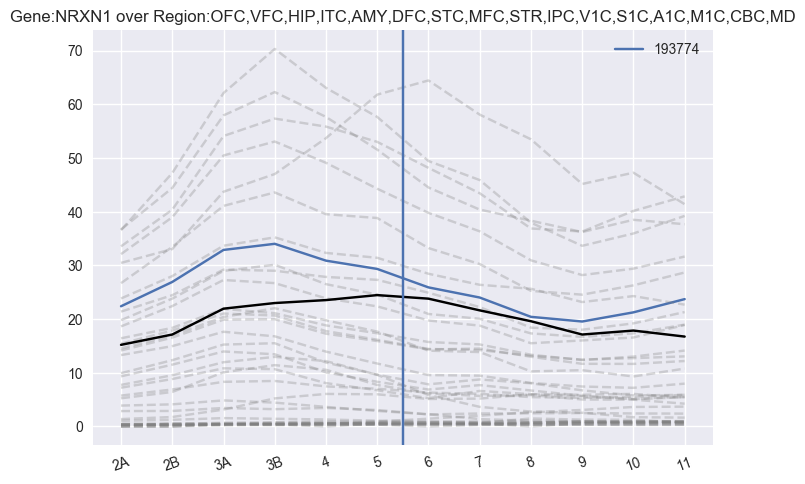

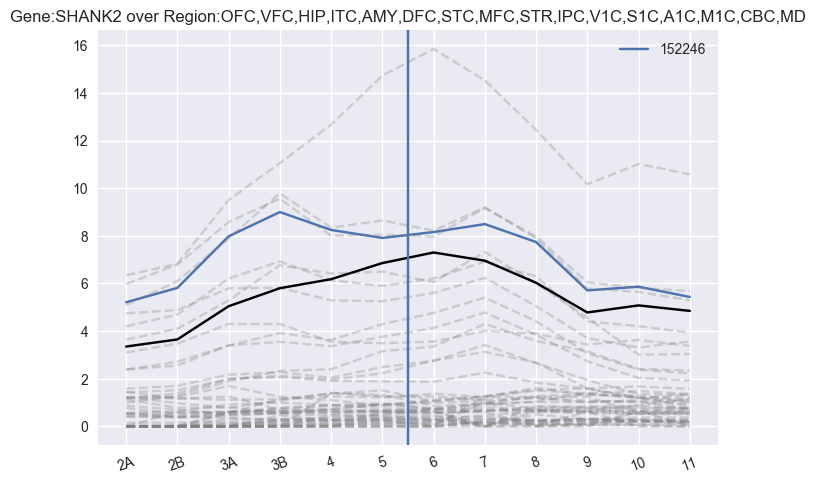

In [68]:
#psd
for gene in ["NRXN1", "SHANK2"]:
    ins.LookGeneExonSumOverRegionwithTargetUntarget(gene, Regionsgt20, 
                                                    bp_exon_row_meta_with_gene, bp_exon_col_meta, ExonExp, GeneDat=GeneDat)

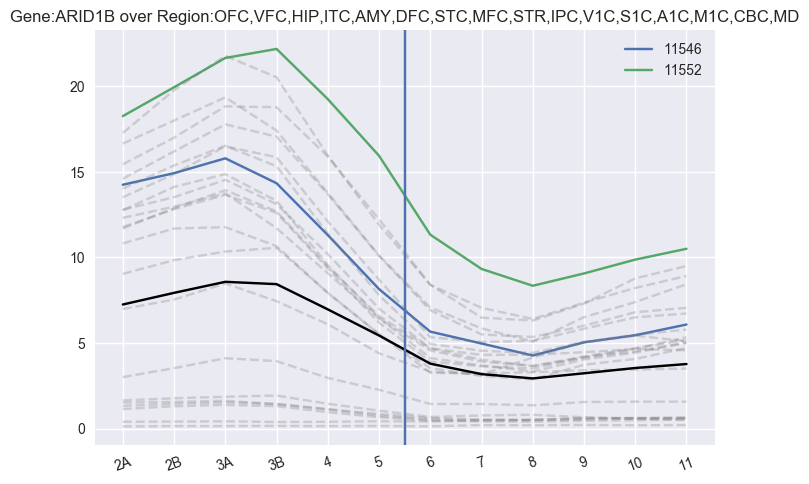

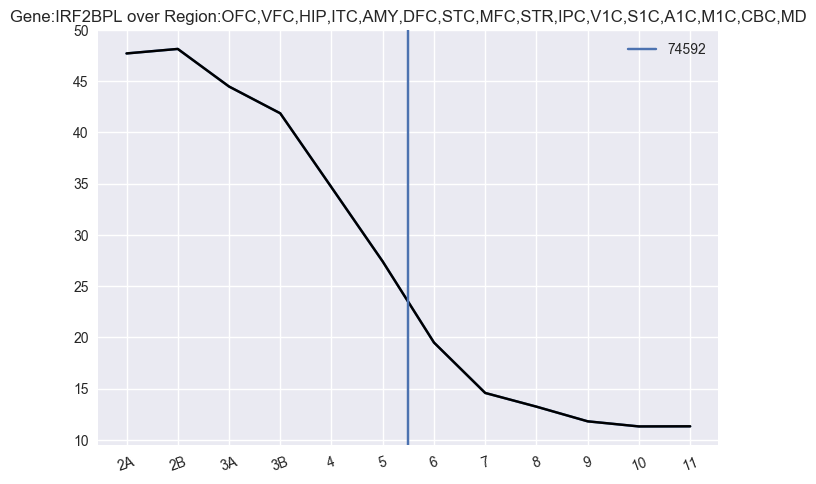

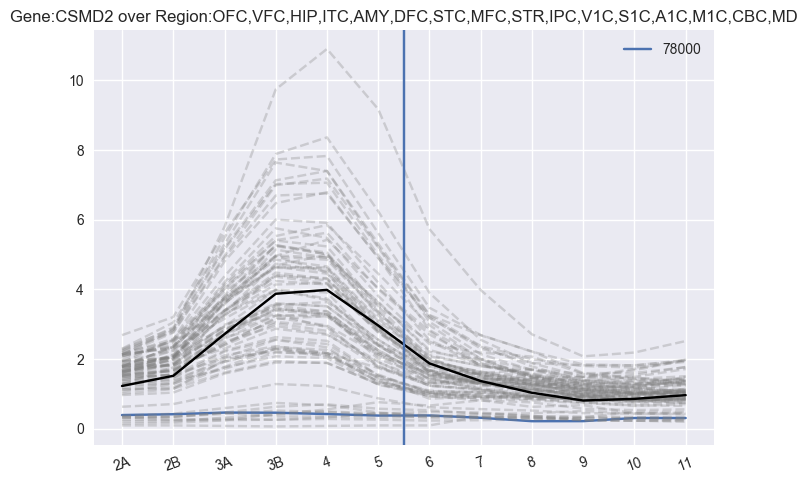

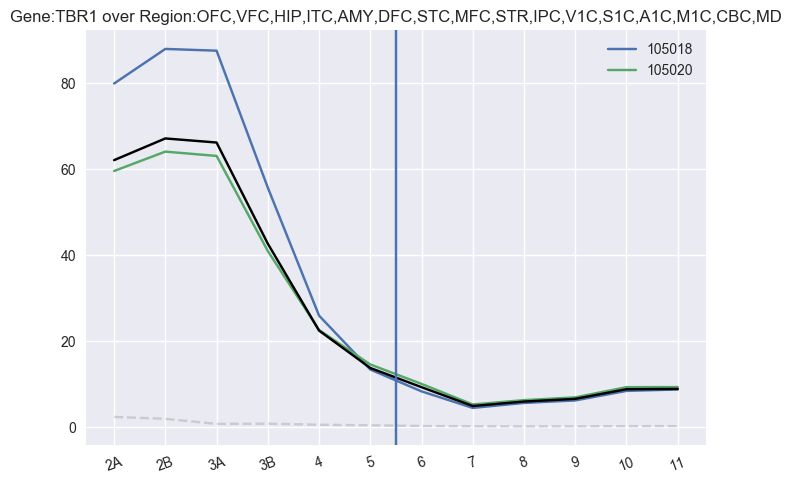

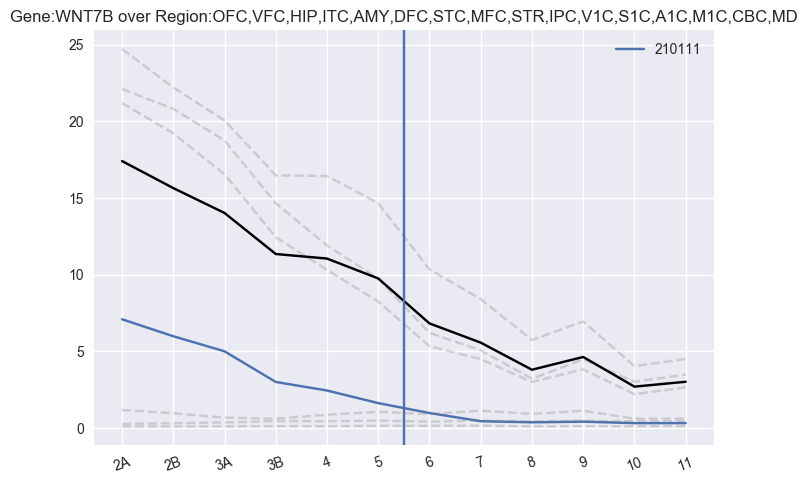

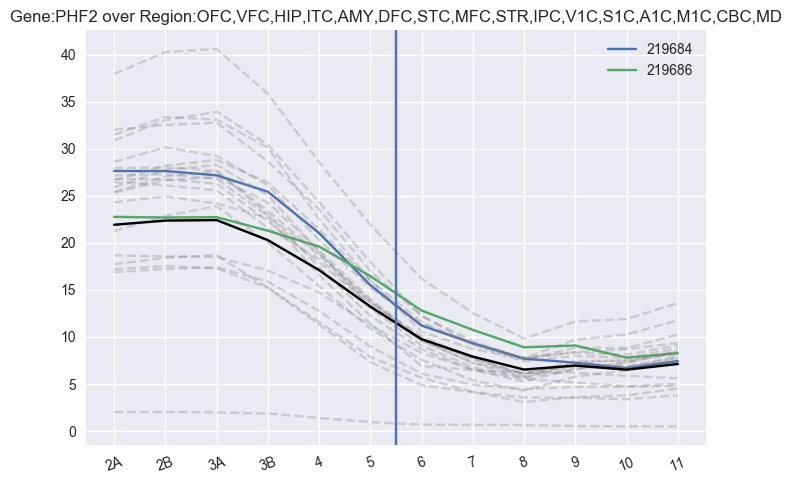

In [69]:
#last exon
for gene in ["ARID1B", "IRF2BPL", "CSMD2", "TBR1", "WNT7B", "PHF2"]:
    ins.LookGeneExonSumOverRegionwithTargetUntarget(gene, Regionsgt20, 
                                                    bp_exon_row_meta_with_gene, bp_exon_col_meta, ExonExp, GeneDat=GeneDat)

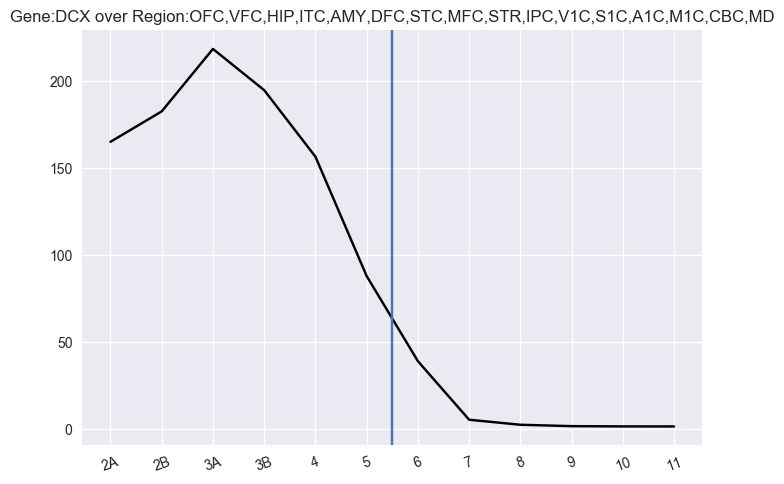

In [70]:
ins.LookGeneExonSumOverRegionwithTargetUntarget("DCX", Regionsgt20, 
                                                    bp_exon_row_meta_with_gene, bp_exon_col_meta, ExonExp, GeneDat=GeneDat)

# NonHitted Exons in Hitted Genes

In [ ]:
cates = {}
for func in ["chromatin", "channel", "sig_skel", "psd"]:
    cates[func] = list(bp_exon_row_meta_without_var[bp_exon_row_meta_without_var["Func"]==func]["row_num"])
LookALLMutationTargetedExon2(cates, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, NormExonExp)
LookALLMutationTargetedExon2(cates, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

In [ ]:
plt.hist(lengths)
plt.show()
longexons = bp_exon_row_meta_with_var[bp_exon_row_meta_with_var["exon length"]>=1000]
shortexons = bp_exon_row_meta_with_var[bp_exon_row_meta_with_var["exon length"]<1000]
print longexons.head()
print shortexons.head()

## Male Genes vs Female Genes /Exones

In [ ]:
rec_lgd_entrez_id = [x.strip() for x in file("/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler-rec-lgd.txt")]
print rec_lgd_entrez_id 
bs_GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/rows_metadata.csv")
rec_lgd_gene_symbols = list(bs_GeneRow[bs_GeneRow["entrez_id"].isin(rec_lgd_entrez_id)]["gene_symbol"])
print len(rec_lgd_gene_symbols), rec_lgd_gene_symbols

In [ ]:
LookALLMutationTargetedGenes(rec_lgd_gene_symbols, Regionsgt20, GeneDat, ylim=(3,4.3), smooth=False)

In [ ]:
test_genes = GeneRow.head(1000)["gene_symbol"]
DisplayGeneSumExpViolin(test_genes, GeneDat, Regionsgt20)

In [ ]:
rec_lgd_entrez_id = [x.strip() for x in file("/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler-rec-lgd.txt")]
print rec_lgd_entrez_id 
bs_GeneRow = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/genes_microarray/rows_metadata.csv")
rec_lgd_gene_symbols = list(bs_GeneRow[bs_GeneRow["entrez_id"].isin(rec_lgd_entrez_id)]["gene_symbol"])
print len(rec_lgd_gene_symbols), rec_lgd_gene_symbols

In [208]:
print VarFile

/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014LGD.xlsx


In [211]:
SynVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014Syn.xlsx"
syn_annotated_exon_row_meta = ins.AssignVar2Exon2(bp_exon_row_meta, SynVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_syn_with_gene = syn_annotated_exon_row_meta[syn_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_syn_with_gene.to_excel("GenesExonsTargetedBySYN.xlsx", index=False)
bp_exon_row_meta_syn_with_var = bp_exon_row_meta_syn_with_gene[bp_exon_row_meta_syn_with_gene["Vars"]!=""]
bp_exon_row_meta_syn_without_var = bp_exon_row_meta_syn_with_gene[bp_exon_row_meta_syn_with_gene["Vars"]==""]
print bp_exon_row_meta_syn_with_gene.shape, bp_exon_row_meta_syn_with_var.shape, bp_exon_row_meta_syn_without_var.shape

309222(20288, 15) (1067, 15) (19221, 15)


Targeted
Untargeted


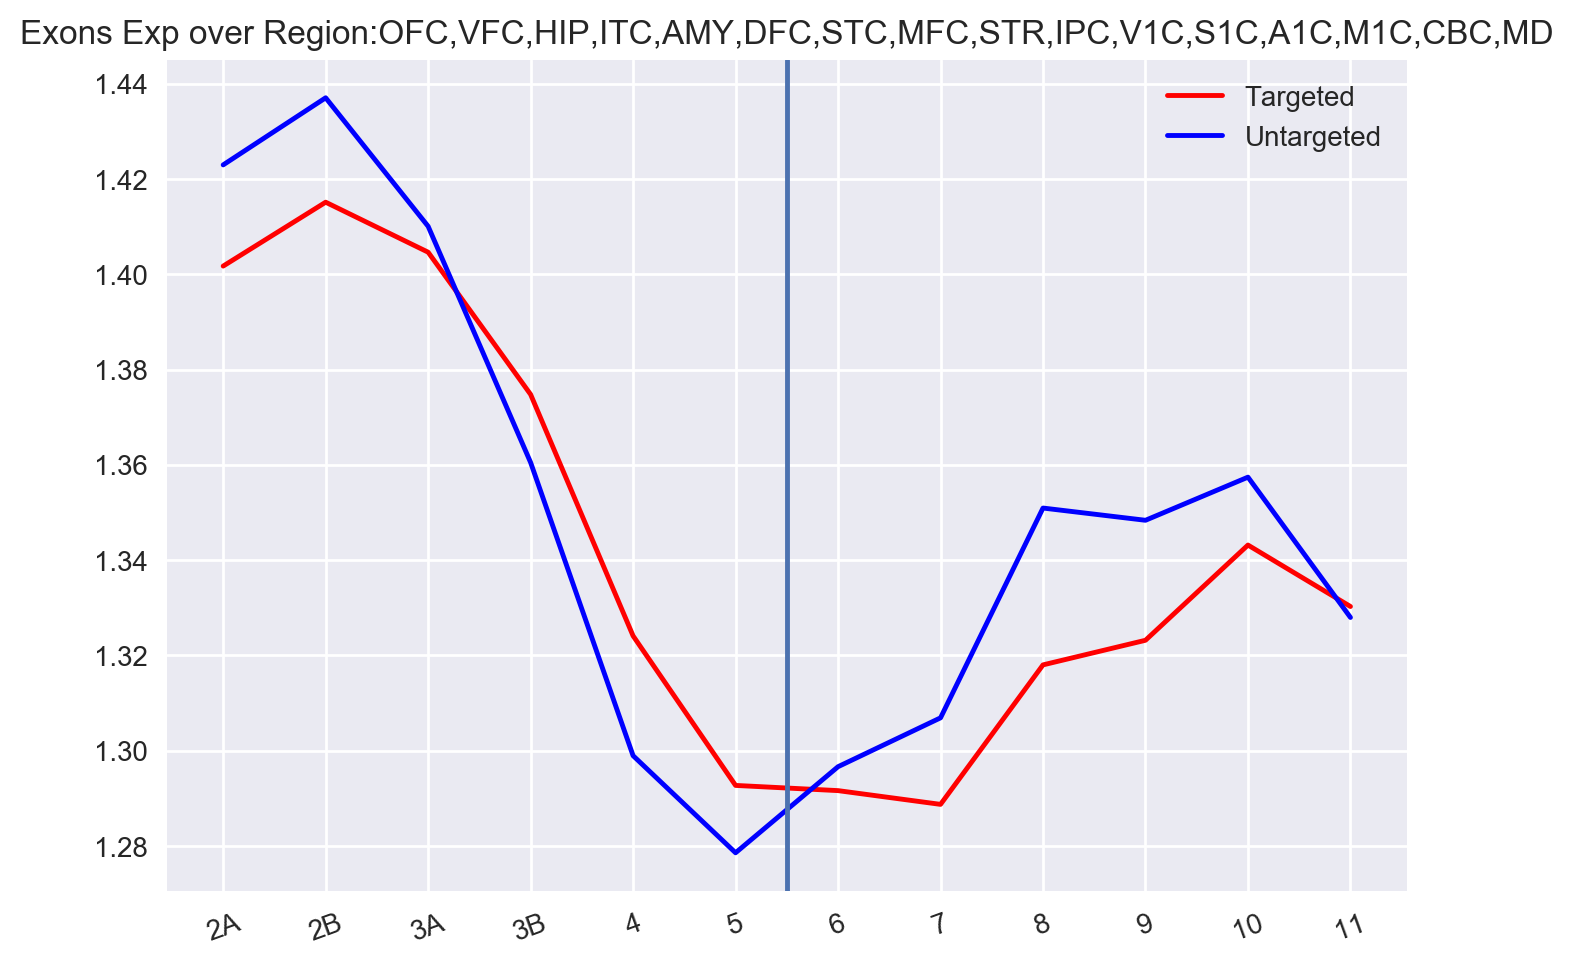

Targeted
Untargeted


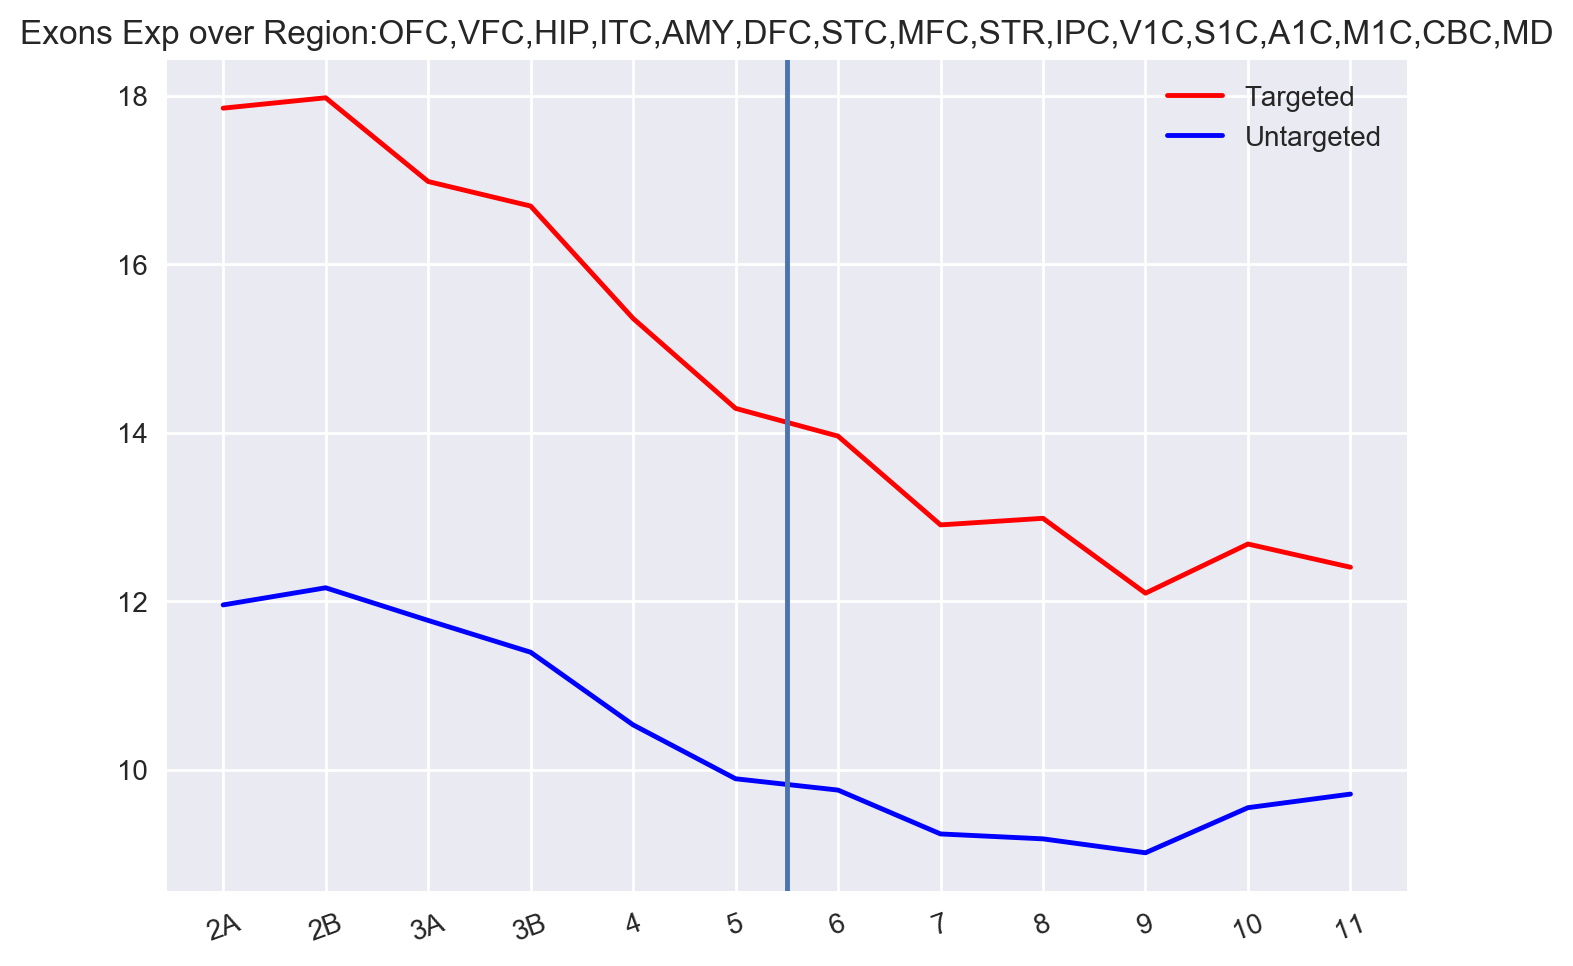

In [212]:
selected_exons = list(bp_exon_row_meta_syn_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_syn_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

In [ ]:
MisVarFile = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014Mis.xlsx"
mis_annotated_exon_row_meta = ins.AssignVar2Exon2(bp_exon_row_meta, MisVarFile, IntersectionWithPredicted=False)
bp_exon_row_meta_mis_with_gene = mis_annotated_exon_row_meta[mis_annotated_exon_row_meta["GeneHited"]=="T"]
bp_exon_row_meta_mis_with_gene.to_excel("GenesExonsTargetedByMIS.xlsx", index=False)
bp_exon_row_meta_mis_with_var = bp_exon_row_meta_mis_with_gene[bp_exon_row_meta_mis_with_gene["Vars"]!=""]
bp_exon_row_meta_mis_without_var = bp_exon_row_meta_mis_with_gene[bp_exon_row_meta_mis_with_gene["Vars"]==""]
print bp_exon_row_meta_mis_with_gene.shape, bp_exon_row_meta_mis_with_var.shape, bp_exon_row_meta_mis_without_var.shape

309222(45239, 15) (2599, 15) (42640, 15)


In [ ]:
selected_exons = list(bp_exon_row_meta_mis_with_var["row_num"])
Notselected_exons = list(bp_exon_row_meta_mis_without_var["row_num"])
Select_UnSelect = dict(zip(["Targeted", "Untargeted"],[("r", selected_exons),("b", Notselected_exons)]))
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, NormExonExp)
lengths = ins.LookALLMutationTargetedExon(Select_UnSelect, Regionsgt20, bp_exon_row_meta, 
                                      bp_exon_col_meta, ExonExp)

Targeted
Loading records:2598
Untargeted
Loading records:30741

# Self Norm

In [44]:
exon_exp_avg2time = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/exon_exp_avg2time.csv")

In [45]:
exon_exp_avg2time.head(2)

column_num    mean_2A   mean_2B    mean_3A    mean_3B     mean_4  \
0           1  27.206792  11.94528  11.393492  11.134947   9.558639   
1           2  55.813774  20.93261  19.904949  21.053577  15.675466   

      mean_5     mean_6    mean_7    mean_8     ...       var_mean_3A  \
0  18.157519  10.861553  4.447872  6.492094     ...          0.737738   
1  28.367266  19.322574  7.411997  9.424933     ...          3.106944   

   var_mean_3B  var_mean_4  var_mean_5  var_mean_6  var_mean_7  var_mean_8  \
0     0.781834    1.249085    2.249990    1.033034    0.164623    0.167769   
1     3.634774    4.036335    5.605992    3.637806    0.514675    0.495950   

   var_mean_9  var_mean_10  var_mean_11  
0    0.324082     0.055629     0.050158  
1    1.230839     0.141350     0.122251  

[2 rows x 25 columns]

In [71]:
for i,func in enumerate(["chromatin", "channel", "sig_skel", "psd"]):
    #cates[func+"_Target_exon"] = (color[i], 
    #                list(bp_exon_row_meta_with_var[bp_exon_row_meta_with_var.Func.str.contains(func)]["row_num"]))
    #cates[func+"_Other_exon"] = (color[i], 
    #                list(bp_exon_row_meta_without_var[bp_exon_row_meta_without_var.Func.str.contains(func)]["row_num"]))
    print bp_exon_row_meta_with_var[bp_exon_row_meta_with_var.Func.str.contains(func)]["gene_symbol"].count()
    #ins.LookALLMutationTargetedExon(cates, Regionsgt20, bp_exon_row_meta, bp_exon_col_meta, NormExonExp)

24
4
4
10
